# imports

In [60]:
from SEAM.utils import *
import SEAM
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import *

# settings

In [2]:
sns.set_style('white')
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 2}

# matplotlib.rc('font', **font)
# matplotlib.rcParams.update({'font.size': 2})

import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
heatmap_cmp = palettable.cmocean.diverging.Balance_20.mpl_colormap


# load

In [67]:
pd_df_list = []

### R1

In [61]:
a = sc.read_h5ad('/home/yzy/projects/SEAM/SEAM_old/data/h5ad/human/R1/data.h5ad')

In [62]:
a.uns['final_cls_colors'] = [c for c in a.uns['final_cls_colors']]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

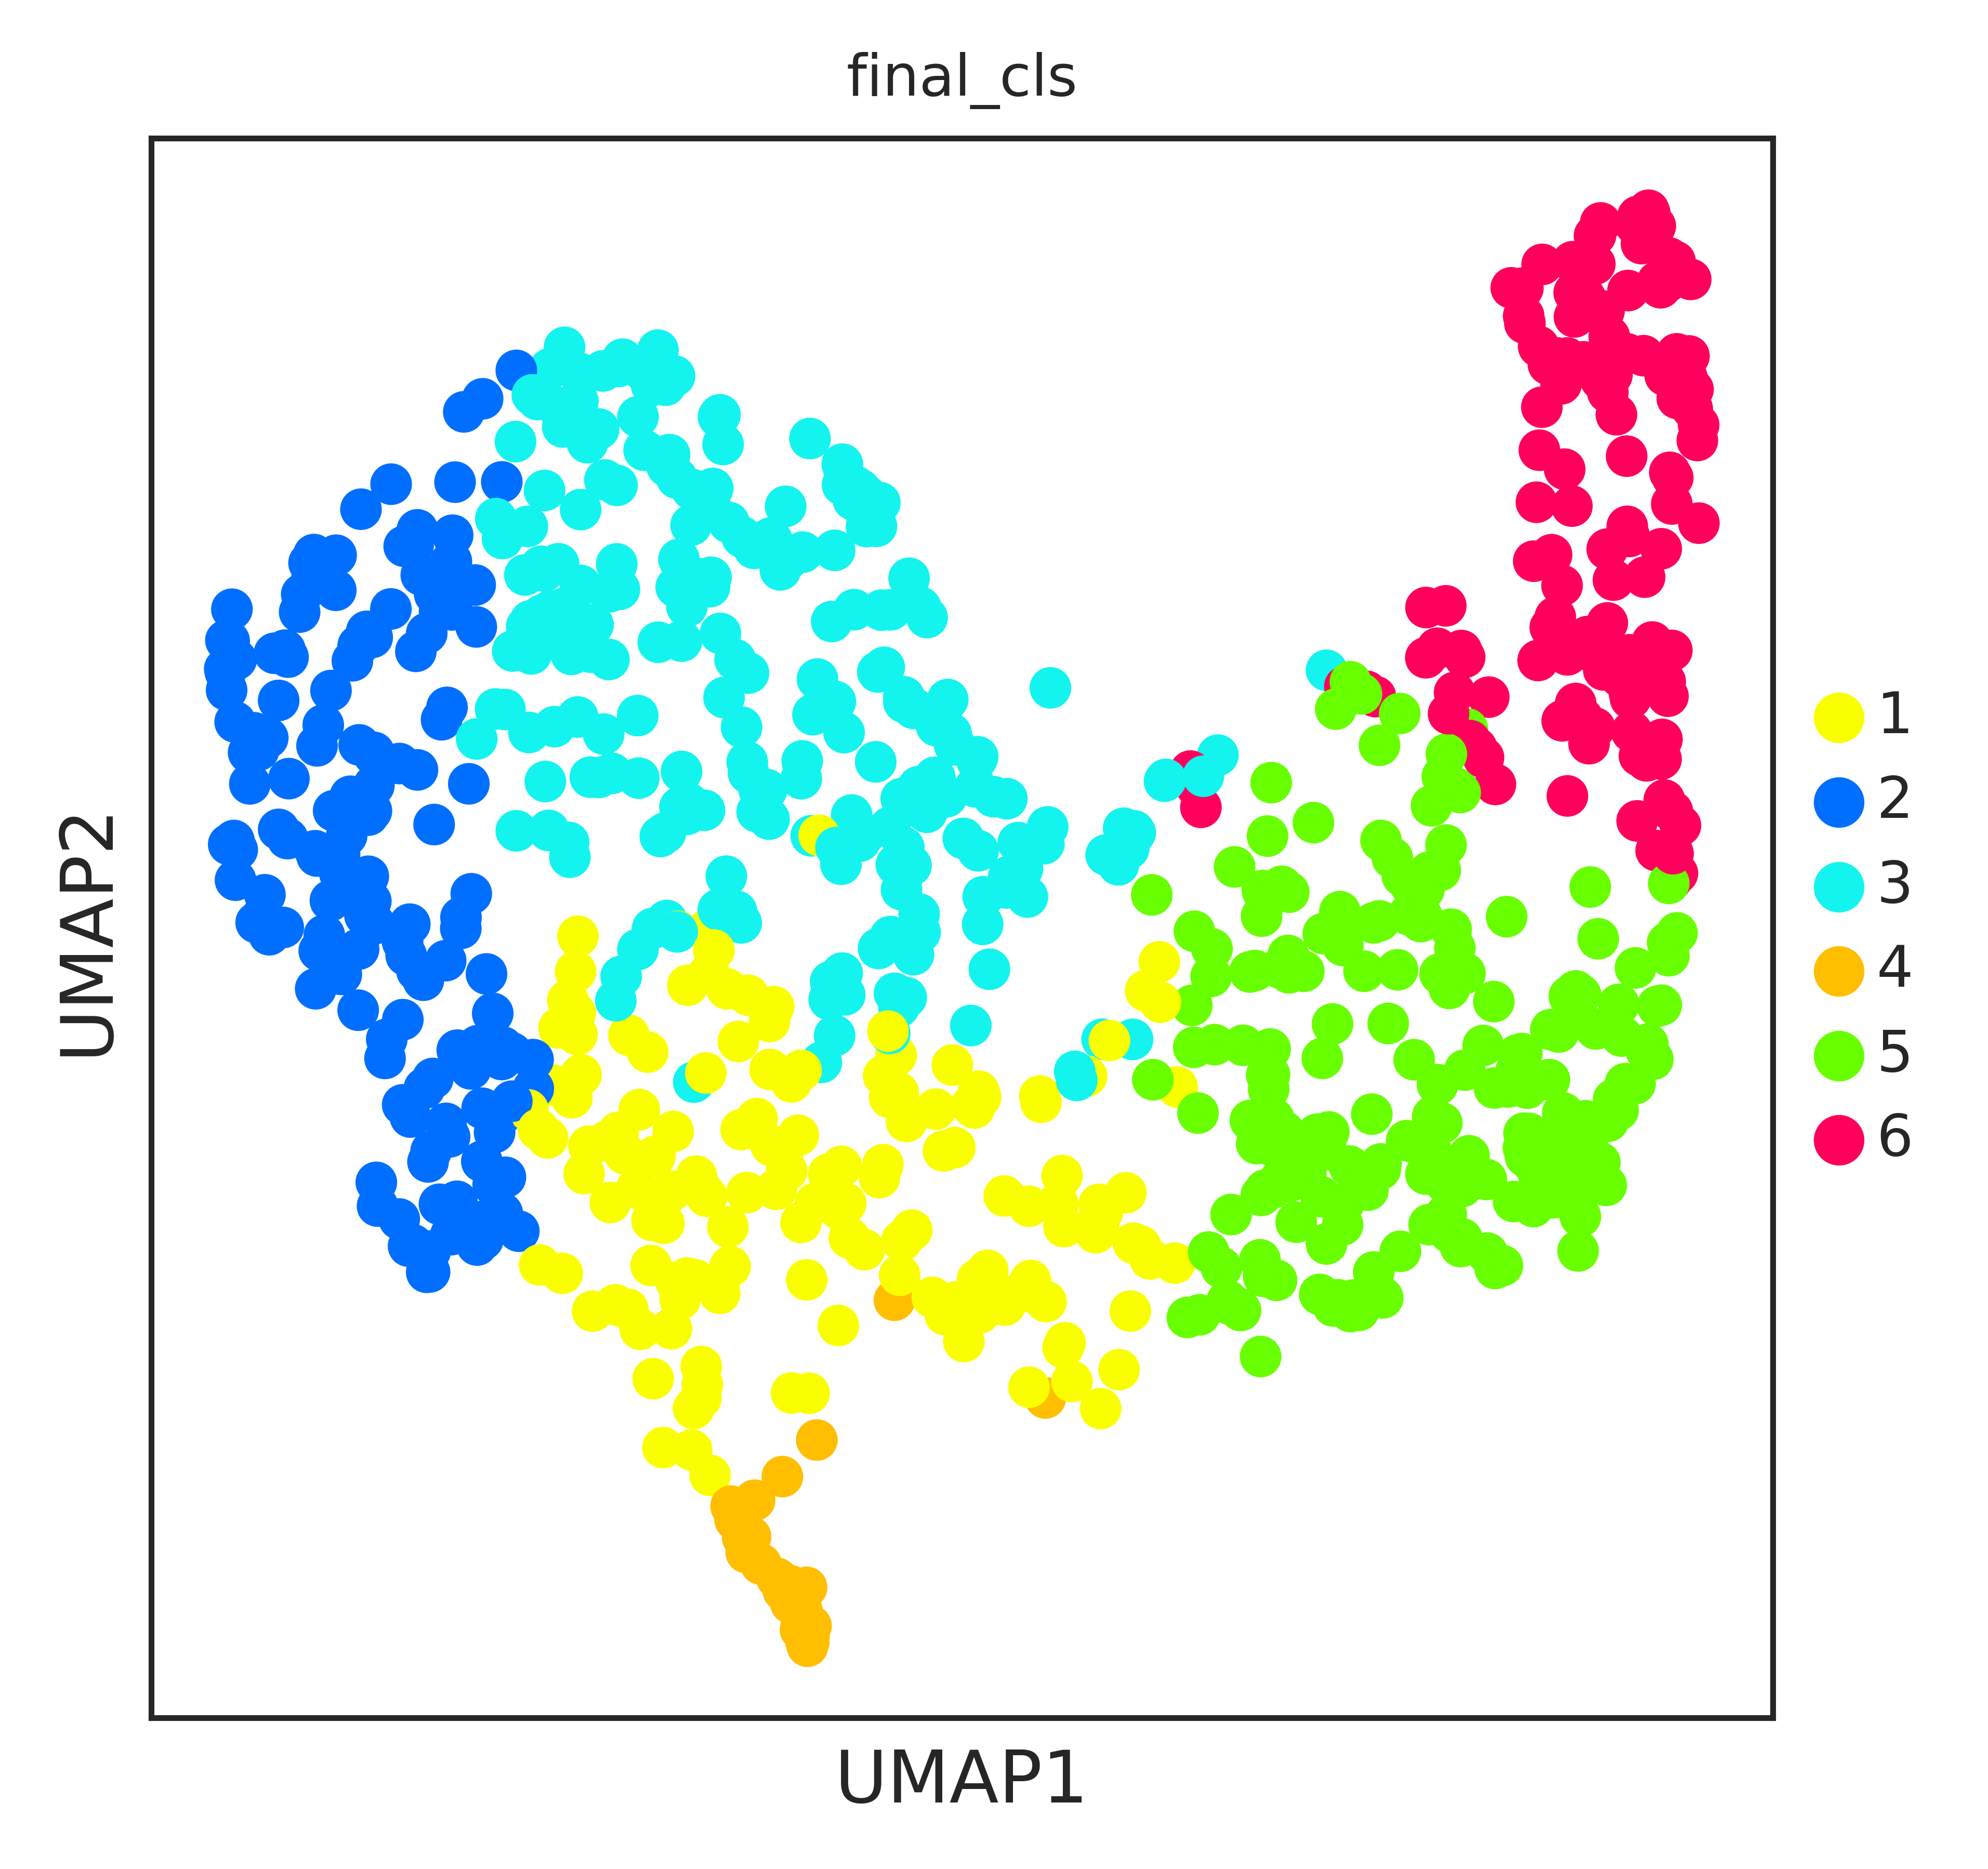

In [63]:
sc.pl.umap(a,color=['final_cls'])

In [64]:
# markers = ['59.3','69.31','71.33','87.36','55.3','101.4','85.37','57.29','53.28','86.35']
markers = ['145.41']

In [65]:
pd_dict = {
    'm/z':[],
    'cls':[],
    'intensity':[],
    'cls_name':[]
}
for c in ['5','6']:
    cls_id_list = [c]
    cls_array = np.array(a.obs['final_cls'])
    marker_idx = [np.where(np.array(a.var_names)==m)[0][0] for m in markers]
    cell_profile = get_pixelProfile_from_clsID(cls_id_list,cls_array)[:,marker_idx]
    for i in range(cell_profile.shape[0]):
        for j in range(cell_profile.shape[1]):
            cur_m = markers[j]
            cur_cls = c
            
            if c=='5':
                cls_name = 'C2'
            if c=='6':
                cls_name = 'C1'
            pd_dict['cls_name'].append(cls_name)
            cur_intensity = cell_profile[i,j]
            pd_dict['m/z'].append(cur_m)
            pd_dict['cls'].append(cur_cls)
            pd_dict['intensity'].append(cur_intensity)

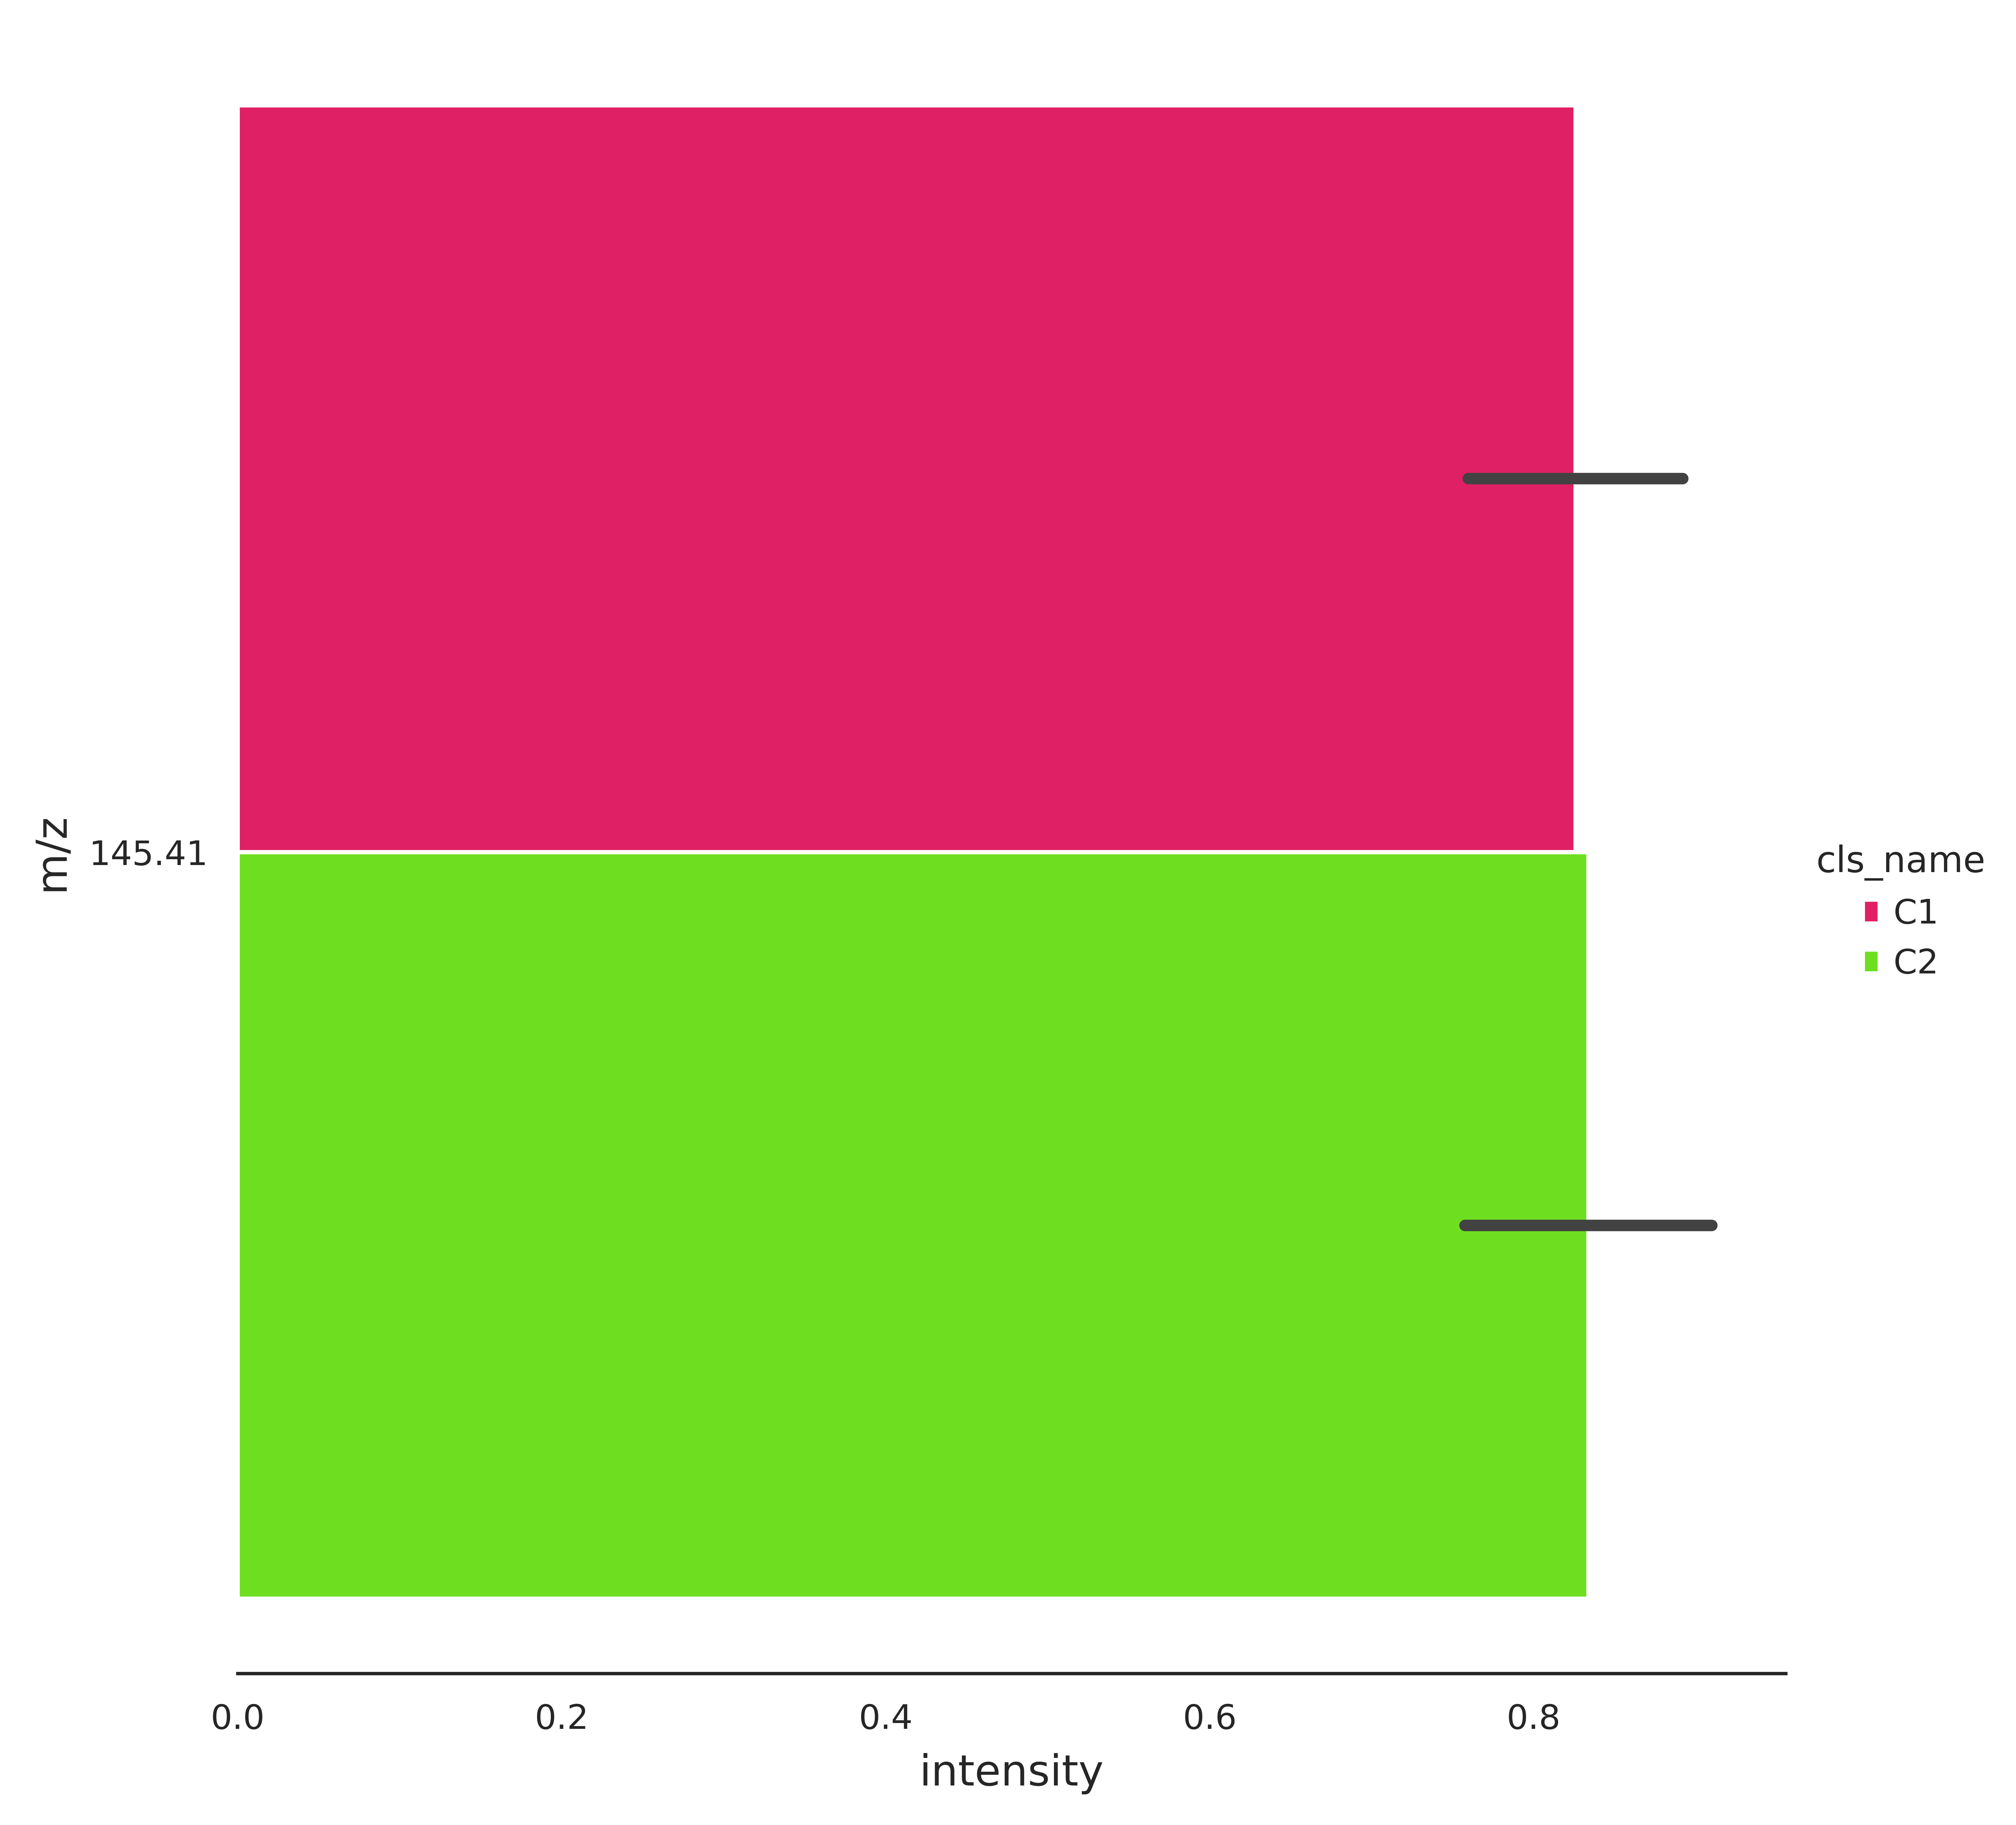

In [66]:
pd_df = pd.DataFrame(pd_dict)
cmp_bold = palettable.cartocolors.qualitative.Bold_10.mpl_colors
# cmp_use = [cmp_bold[4],cmp_bold[0],cmp_bold[1],cmp_bold[2],cmp_bold[3],cmp_bold[5]]
# hue_order = ['SIMSCut','EB','HMRF','RW','Threshold','WSedt']
hue_order = ['C1','C2']
cmp_use = a.uns['final_cls_colors'][-3:][::-1]
order = markers
g = sns.catplot(
    data=pd_df, kind="bar",
    x="intensity", y="m/z", hue="cls_name",aspect=1,
    ci="sd", alpha=1, height=6,
    order=order,palette=cmp_use,hue_order=hue_order,
    orient='h',
)
g.despine(left=True)
g.set_axis_labels("intensity", "m/z")
# g.legend.set_title("")

In [71]:
pd_df_list.append(pd_df[['intensity','cls_name']])

### R2

In [72]:
a = sc.read_h5ad('/home/yzy/projects/SEAM/SEAM_old/data/h5ad/human/R2/data.h5ad')

In [73]:
a.uns['final_cls_colors'] = [c for c in a.uns['final_cls_colors']]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

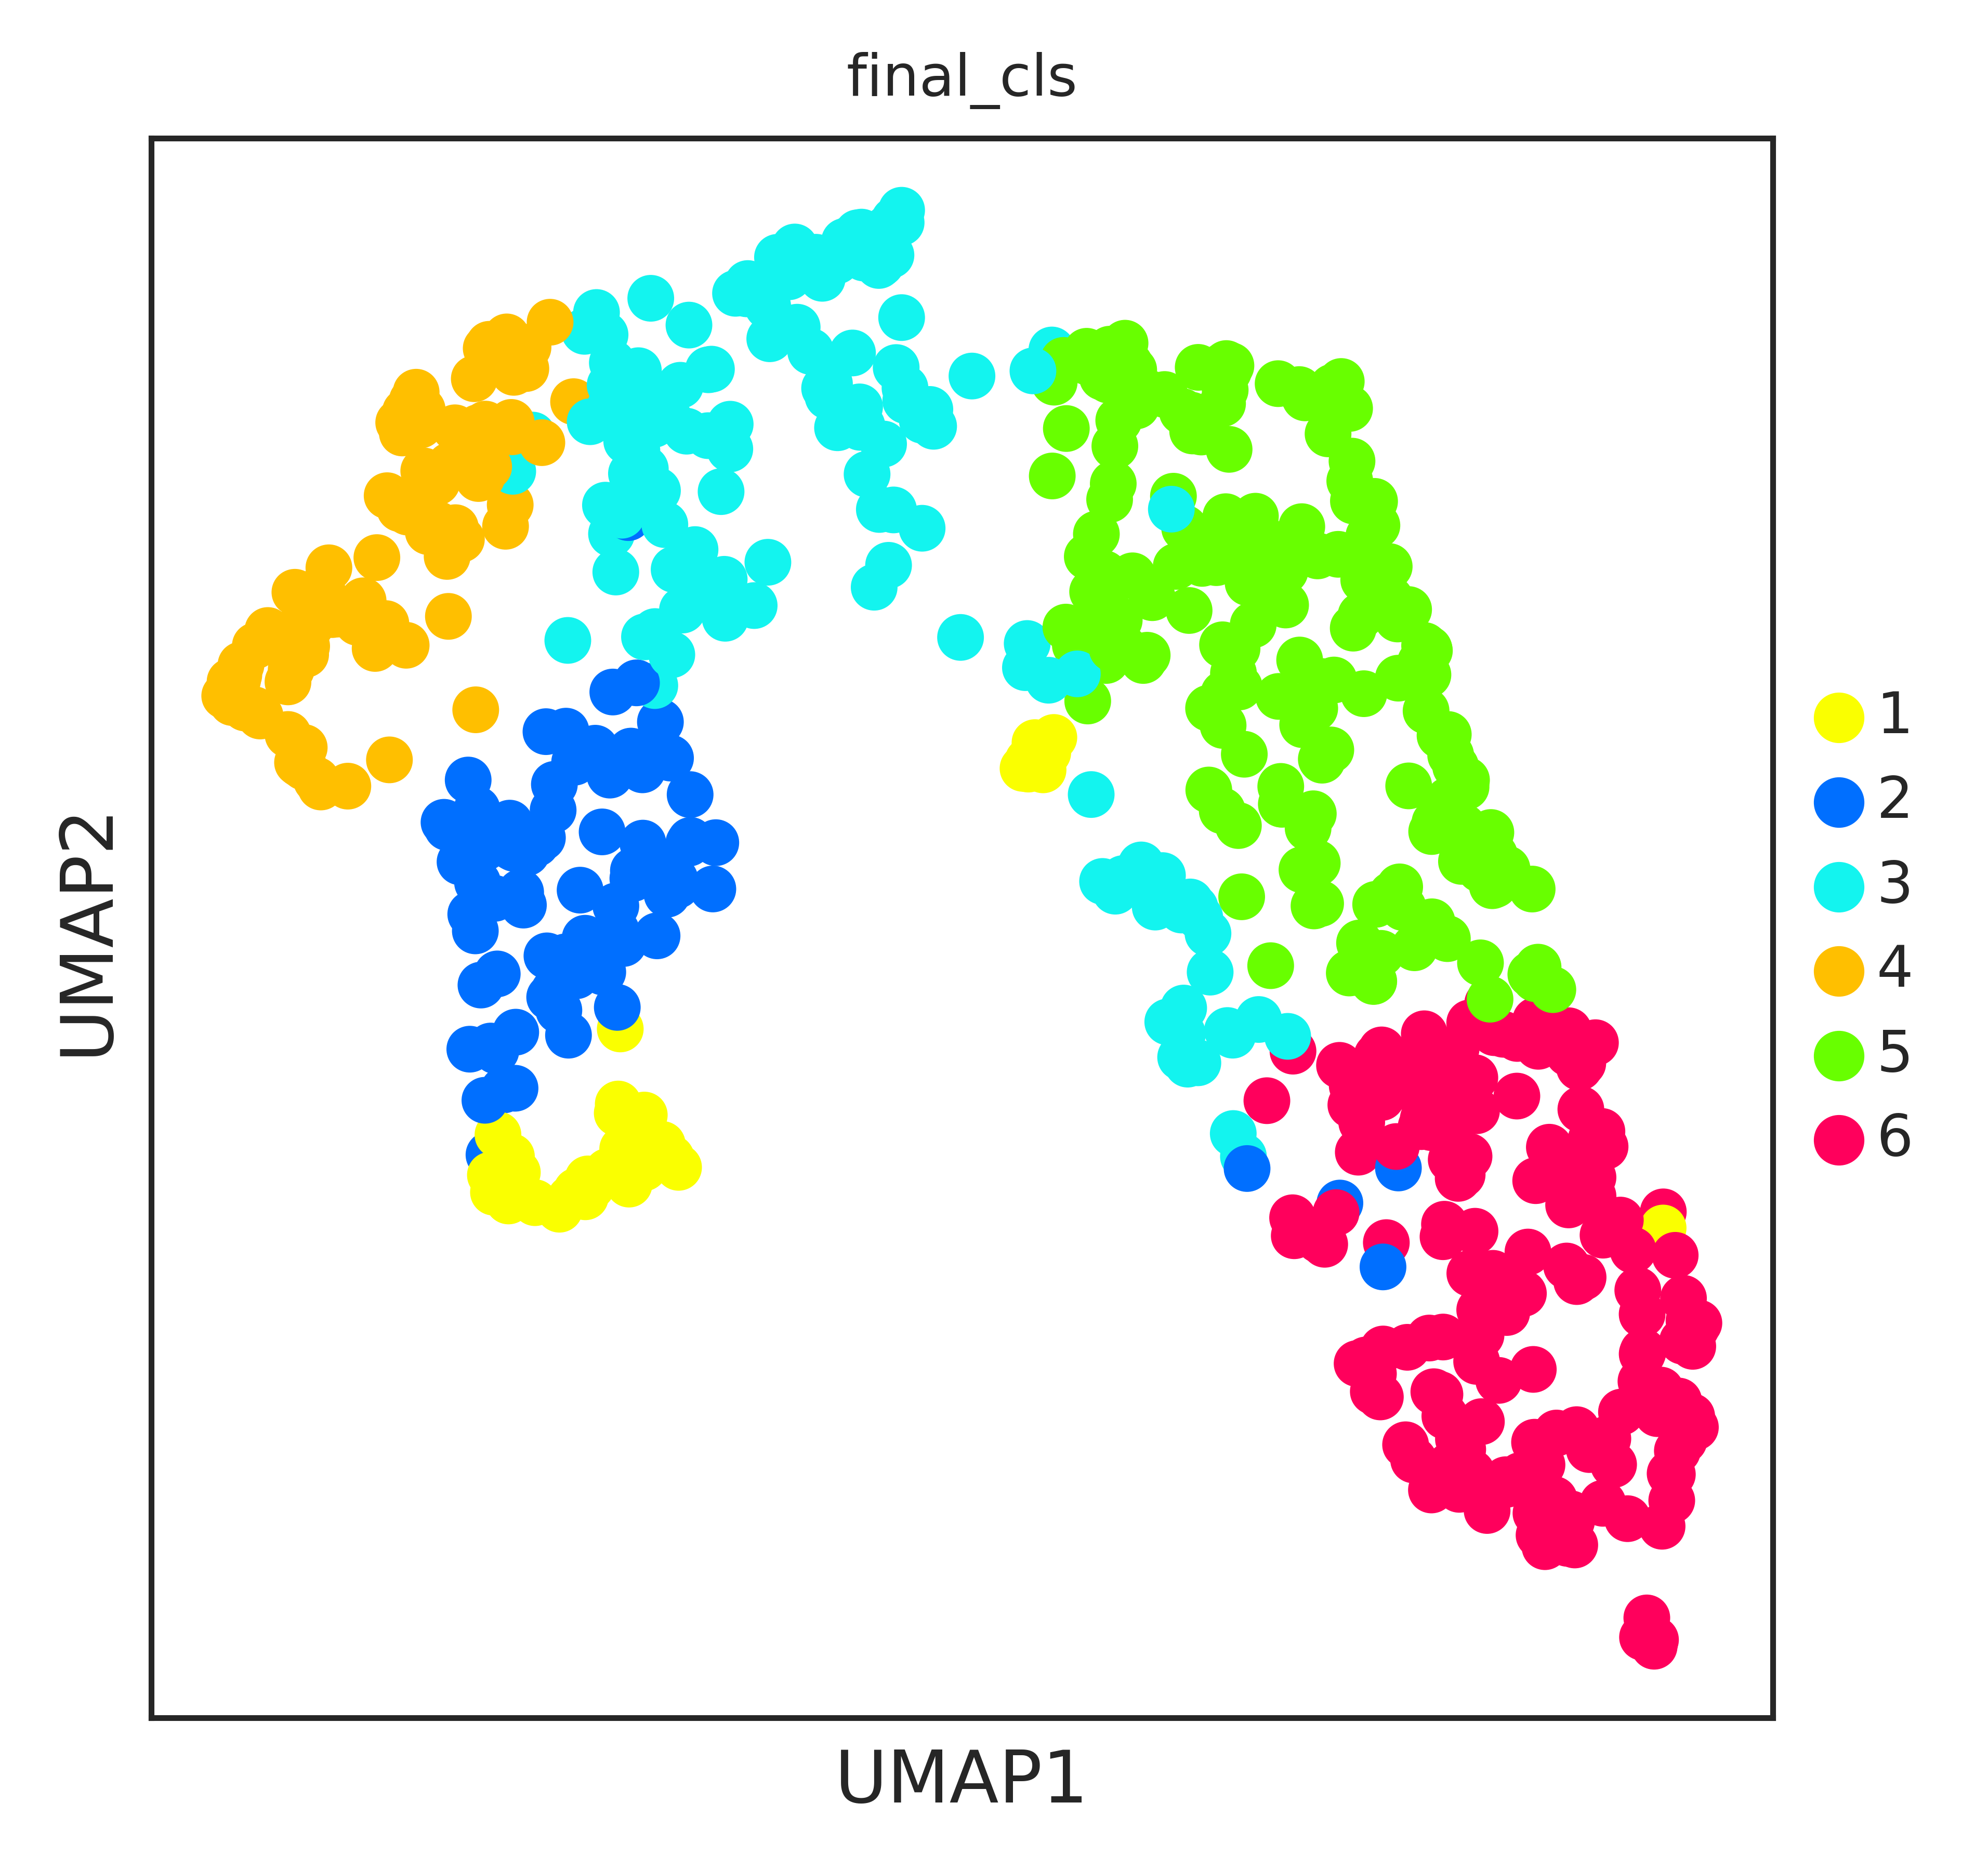

In [74]:
sc.pl.umap(a,color=['final_cls'])

In [75]:
# markers = ['59.3','69.31','71.33','87.36','55.3','101.4','85.37','57.29','53.28','86.35']
markers = ['145.41']

In [76]:
pd_dict = {
    'm/z':[],
    'cls':[],
    'intensity':[],
    'cls_name':[]
}
for c in ['5','6']:
    cls_id_list = [c]
    cls_array = np.array(a.obs['final_cls'])
    marker_idx = [np.where(np.array(a.var_names)==m)[0][0] for m in markers]
    cell_profile = get_pixelProfile_from_clsID(cls_id_list,cls_array)[:,marker_idx]
    for i in range(cell_profile.shape[0]):
        for j in range(cell_profile.shape[1]):
            cur_m = markers[j]
            cur_cls = c
            
            if c=='5':
                cls_name = 'C2'
            if c=='6':
                cls_name = 'C1'
            pd_dict['cls_name'].append(cls_name)
            cur_intensity = cell_profile[i,j]
            pd_dict['m/z'].append(cur_m)
            pd_dict['cls'].append(cur_cls)
            pd_dict['intensity'].append(cur_intensity)

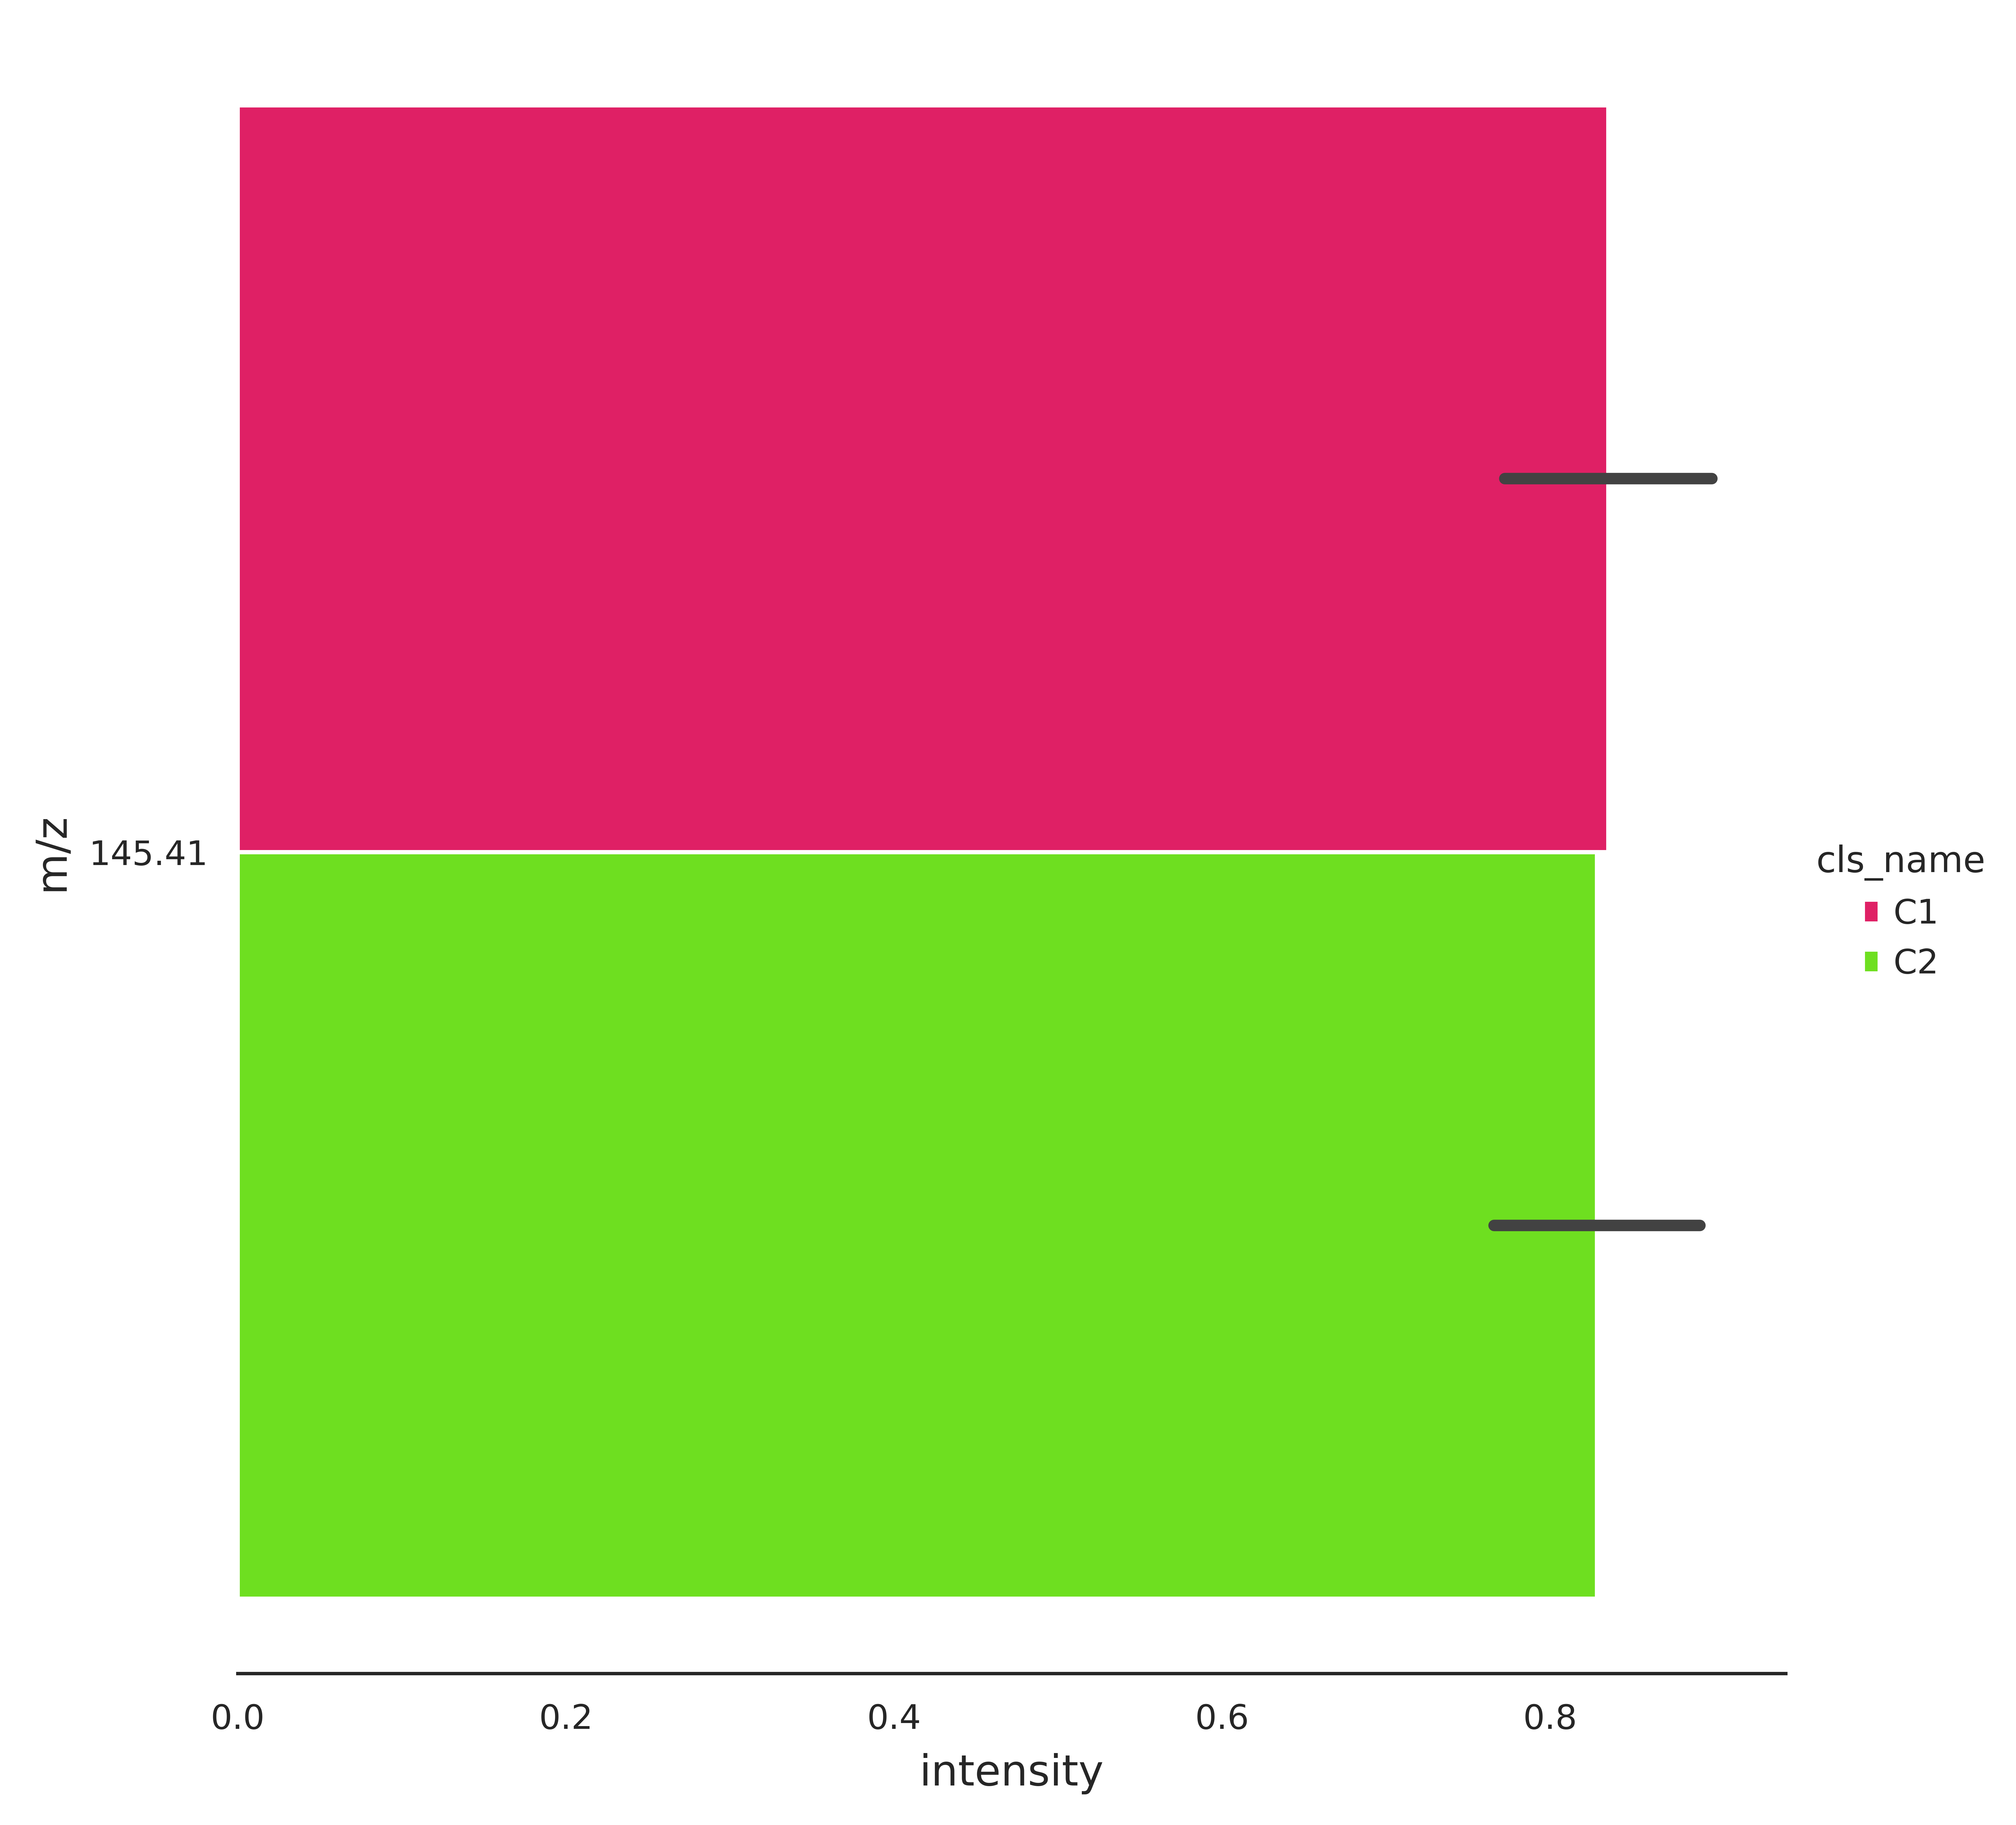

In [77]:
pd_df = pd.DataFrame(pd_dict)
cmp_bold = palettable.cartocolors.qualitative.Bold_10.mpl_colors
# cmp_use = [cmp_bold[4],cmp_bold[0],cmp_bold[1],cmp_bold[2],cmp_bold[3],cmp_bold[5]]
# hue_order = ['SIMSCut','EB','HMRF','RW','Threshold','WSedt']
hue_order = ['C1','C2']
cmp_use = a.uns['final_cls_colors'][-3:][::-1]
order = markers
g = sns.catplot(
    data=pd_df, kind="bar",
    x="intensity", y="m/z", hue="cls_name",aspect=1,
    ci="sd", alpha=1, height=6,
    order=order,palette=cmp_use,hue_order=hue_order,
    orient='h',
)
g.despine(left=True)
g.set_axis_labels("intensity", "m/z")
# g.legend.set_title("")

In [78]:
pd_df_list.append(pd_df[['intensity','cls_name']])

### R3

In [79]:
a = sc.read_h5ad('/home/yzy/projects/SEAM/SEAM_old/data/h5ad/human/R3/data.h5ad')

In [80]:
a.uns['final_cls_colors'] = [c for c in a.uns['final_cls_colors']]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

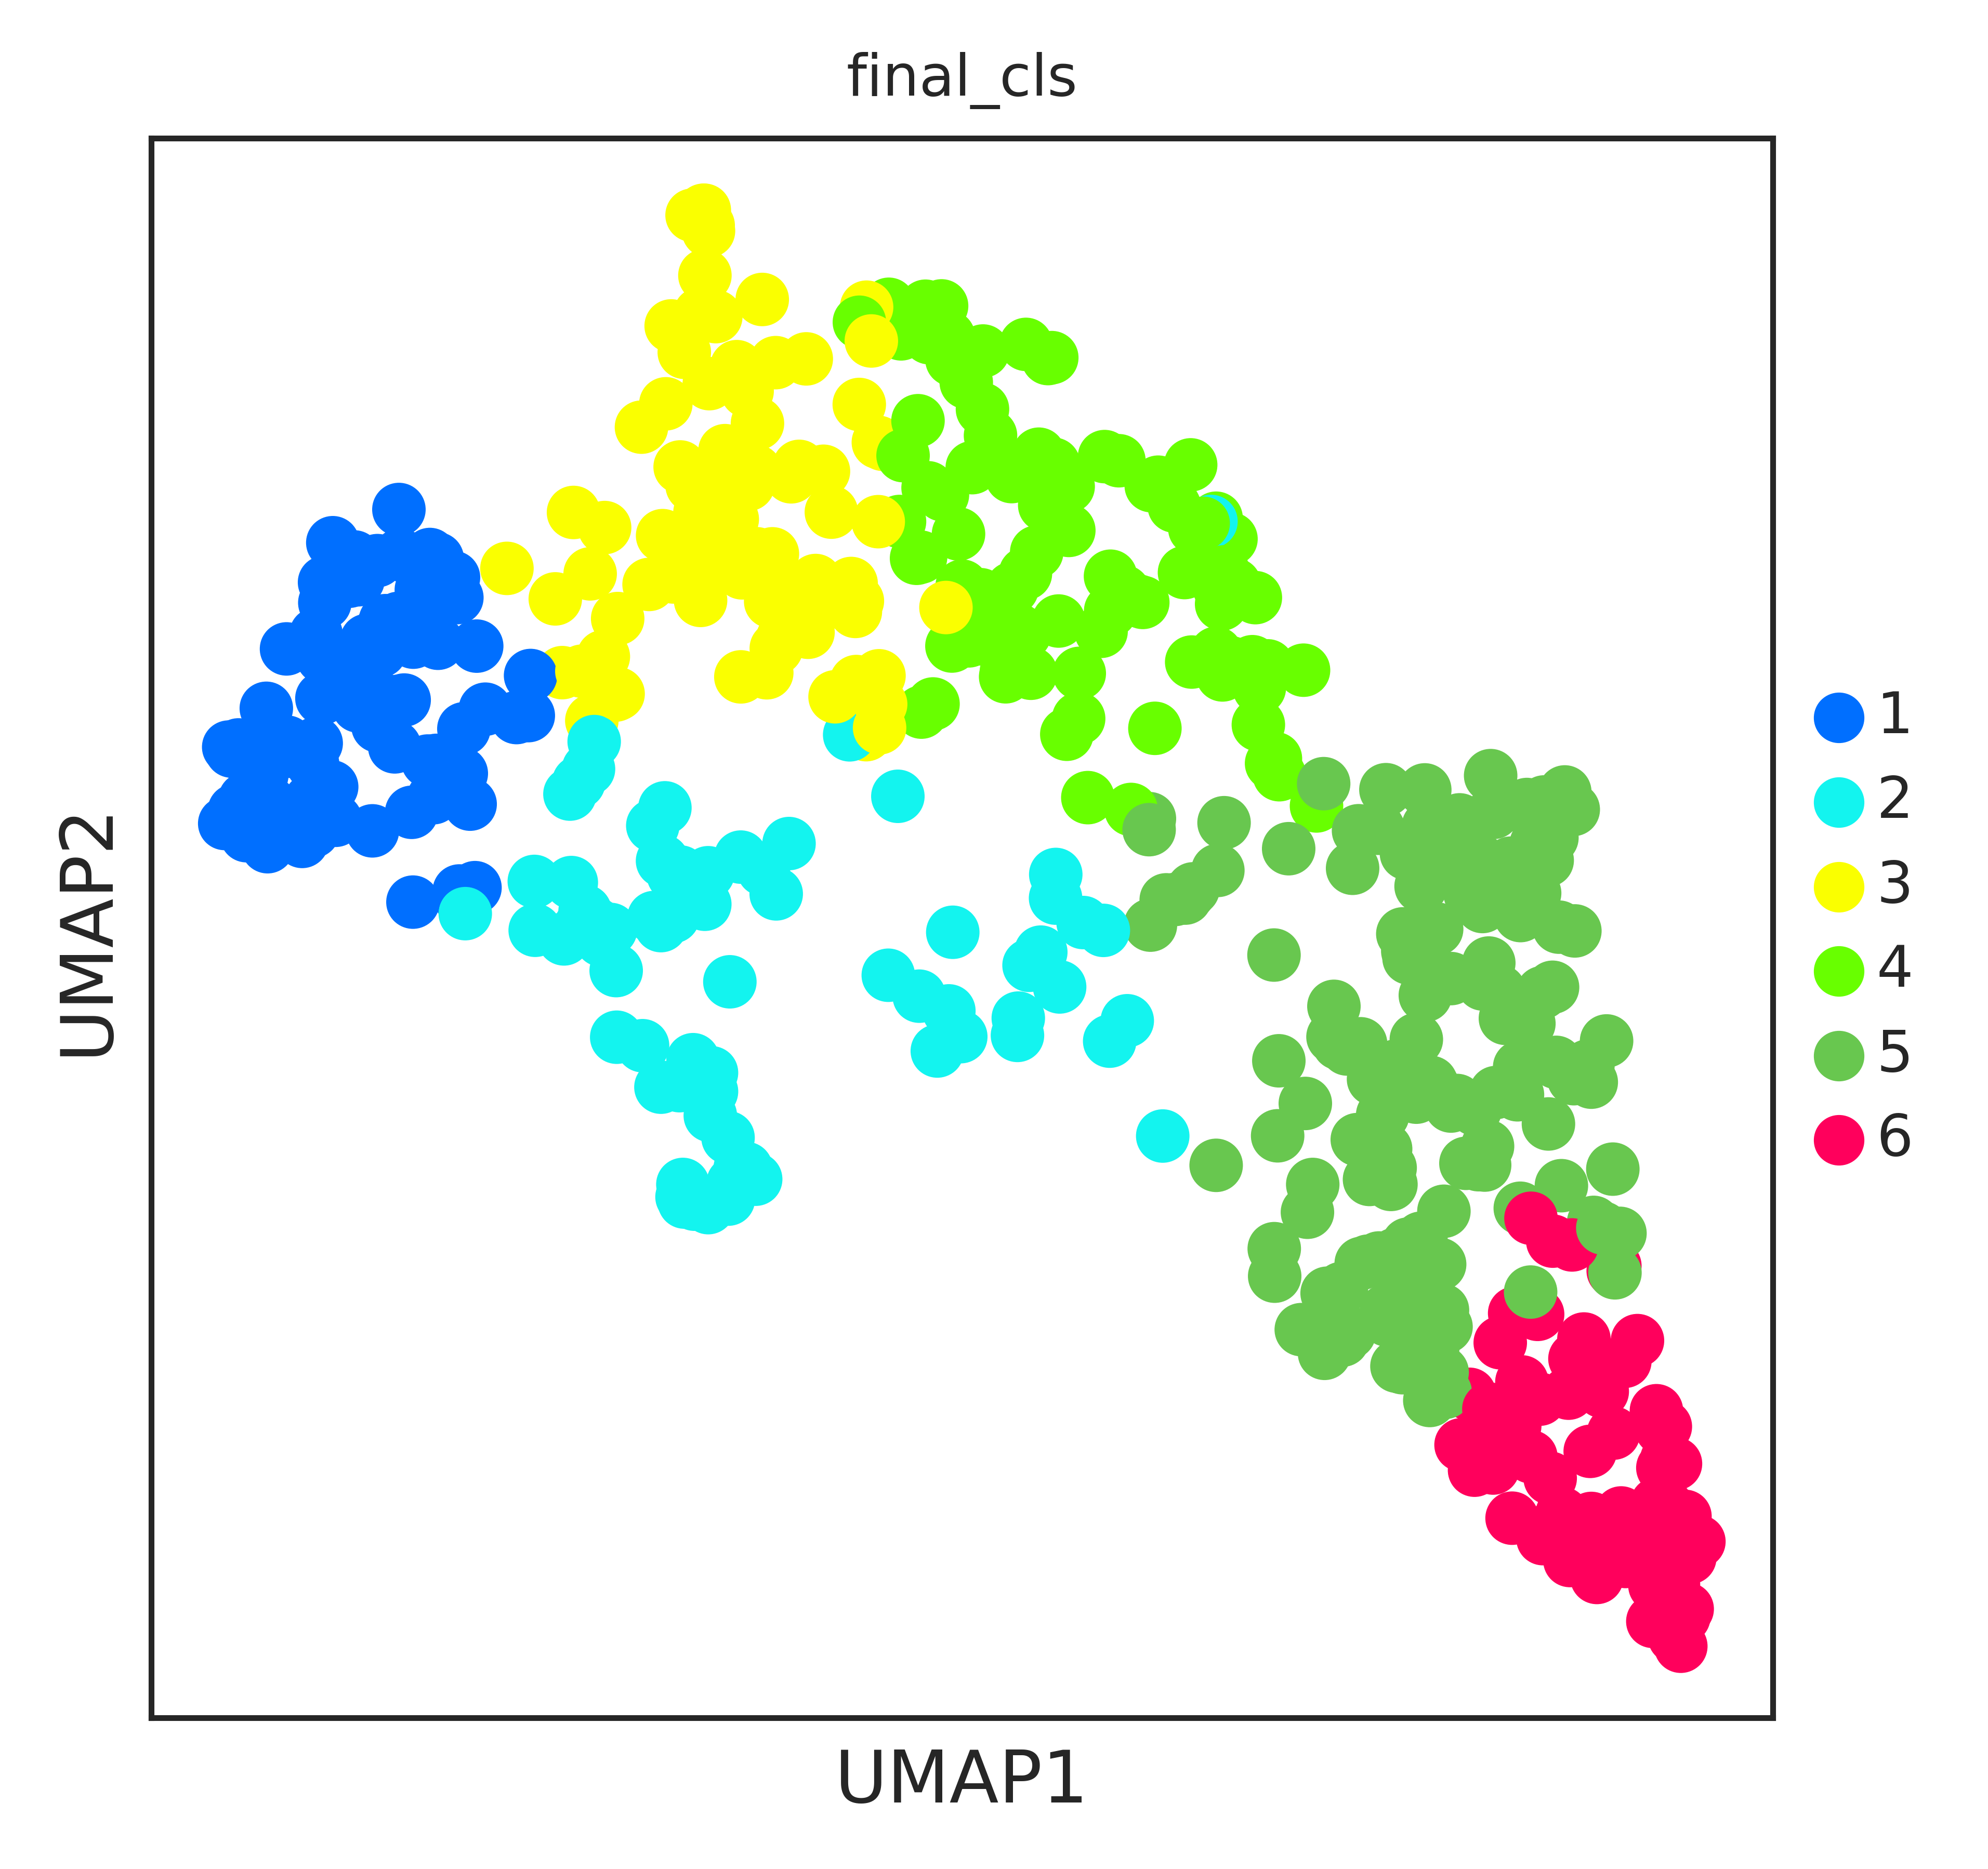

In [81]:
sc.pl.umap(a,color=['final_cls'])

In [82]:
# markers = ['59.3','69.31','71.33','87.36','55.3','101.4','85.37','57.29','53.28','86.35']
markers = ['145.42']

In [83]:
pd_dict = {
    'm/z':[],
    'cls':[],
    'intensity':[],
    'cls_name':[]
}
for c in ['4','6']:
    cls_id_list = [c]
    cls_array = np.array(a.obs['final_cls'])
    marker_idx = [np.where(np.array(a.var_names)==m)[0][0] for m in markers]
    cell_profile = get_pixelProfile_from_clsID(cls_id_list,cls_array)[:,marker_idx]
    for i in range(cell_profile.shape[0]):
        for j in range(cell_profile.shape[1]):
            cur_m = markers[j]
            cur_cls = c
            
            if c=='4':
                cls_name = 'C2'
            if c=='6':
                cls_name = 'C1'
            pd_dict['cls_name'].append(cls_name)
            cur_intensity = cell_profile[i,j]
            pd_dict['m/z'].append(cur_m)
            pd_dict['cls'].append(cur_cls)
            pd_dict['intensity'].append(cur_intensity)

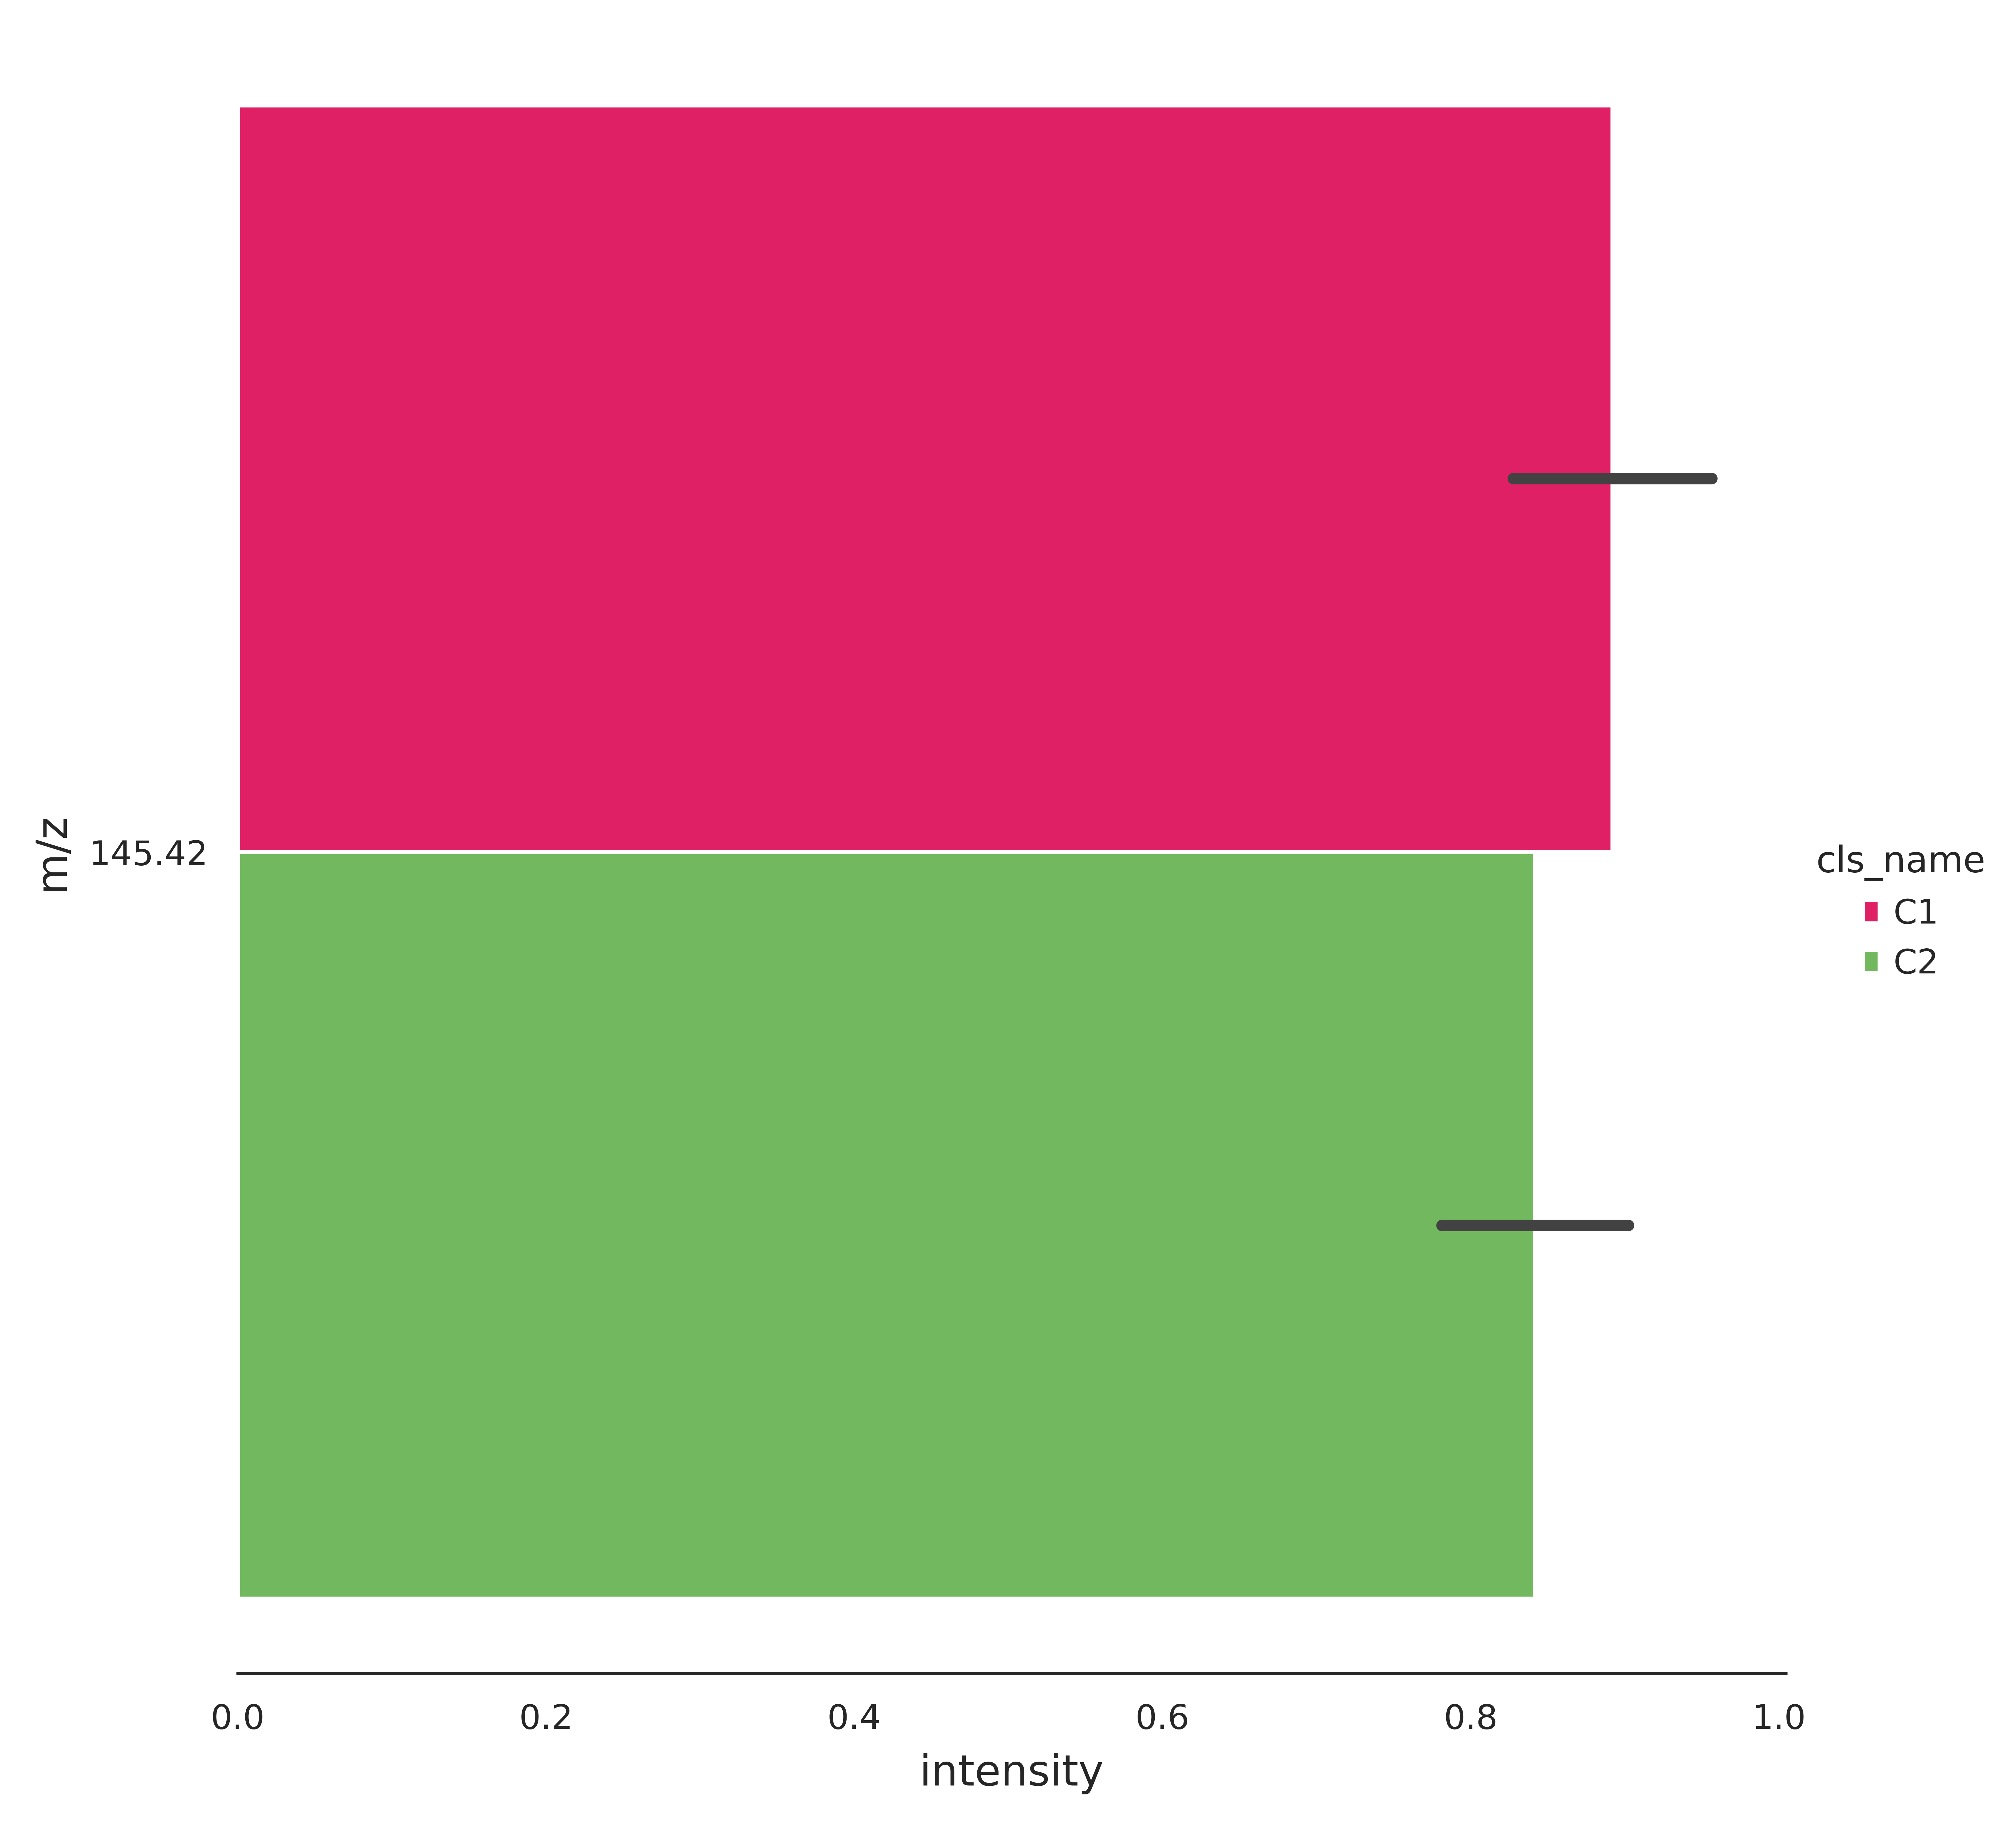

In [84]:
pd_df = pd.DataFrame(pd_dict)
cmp_bold = palettable.cartocolors.qualitative.Bold_10.mpl_colors
# cmp_use = [cmp_bold[4],cmp_bold[0],cmp_bold[1],cmp_bold[2],cmp_bold[3],cmp_bold[5]]
# hue_order = ['SIMSCut','EB','HMRF','RW','Threshold','WSedt']
hue_order = ['C1','C2']
cmp_use = a.uns['final_cls_colors'][-3:][::-1]
order = markers
g = sns.catplot(
    data=pd_df, kind="bar",
    x="intensity", y="m/z", hue="cls_name",aspect=1,
    ci="sd", alpha=1, height=6,
    order=order,palette=cmp_use,hue_order=hue_order,
    orient='h',
)
g.despine(left=True)
g.set_axis_labels("intensity", "m/z")
# g.legend.set_title("")

In [85]:
pd_df_list.append(pd_df[['intensity','cls_name']])

### R4

In [86]:
a = sc.read_h5ad('/home/yzy/projects/SEAM/SEAM_old/data/h5ad/human/R4/data.h5ad')

In [87]:
a.uns['final_cls_colors'] = [c for c in a.uns['final_cls_colors']]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

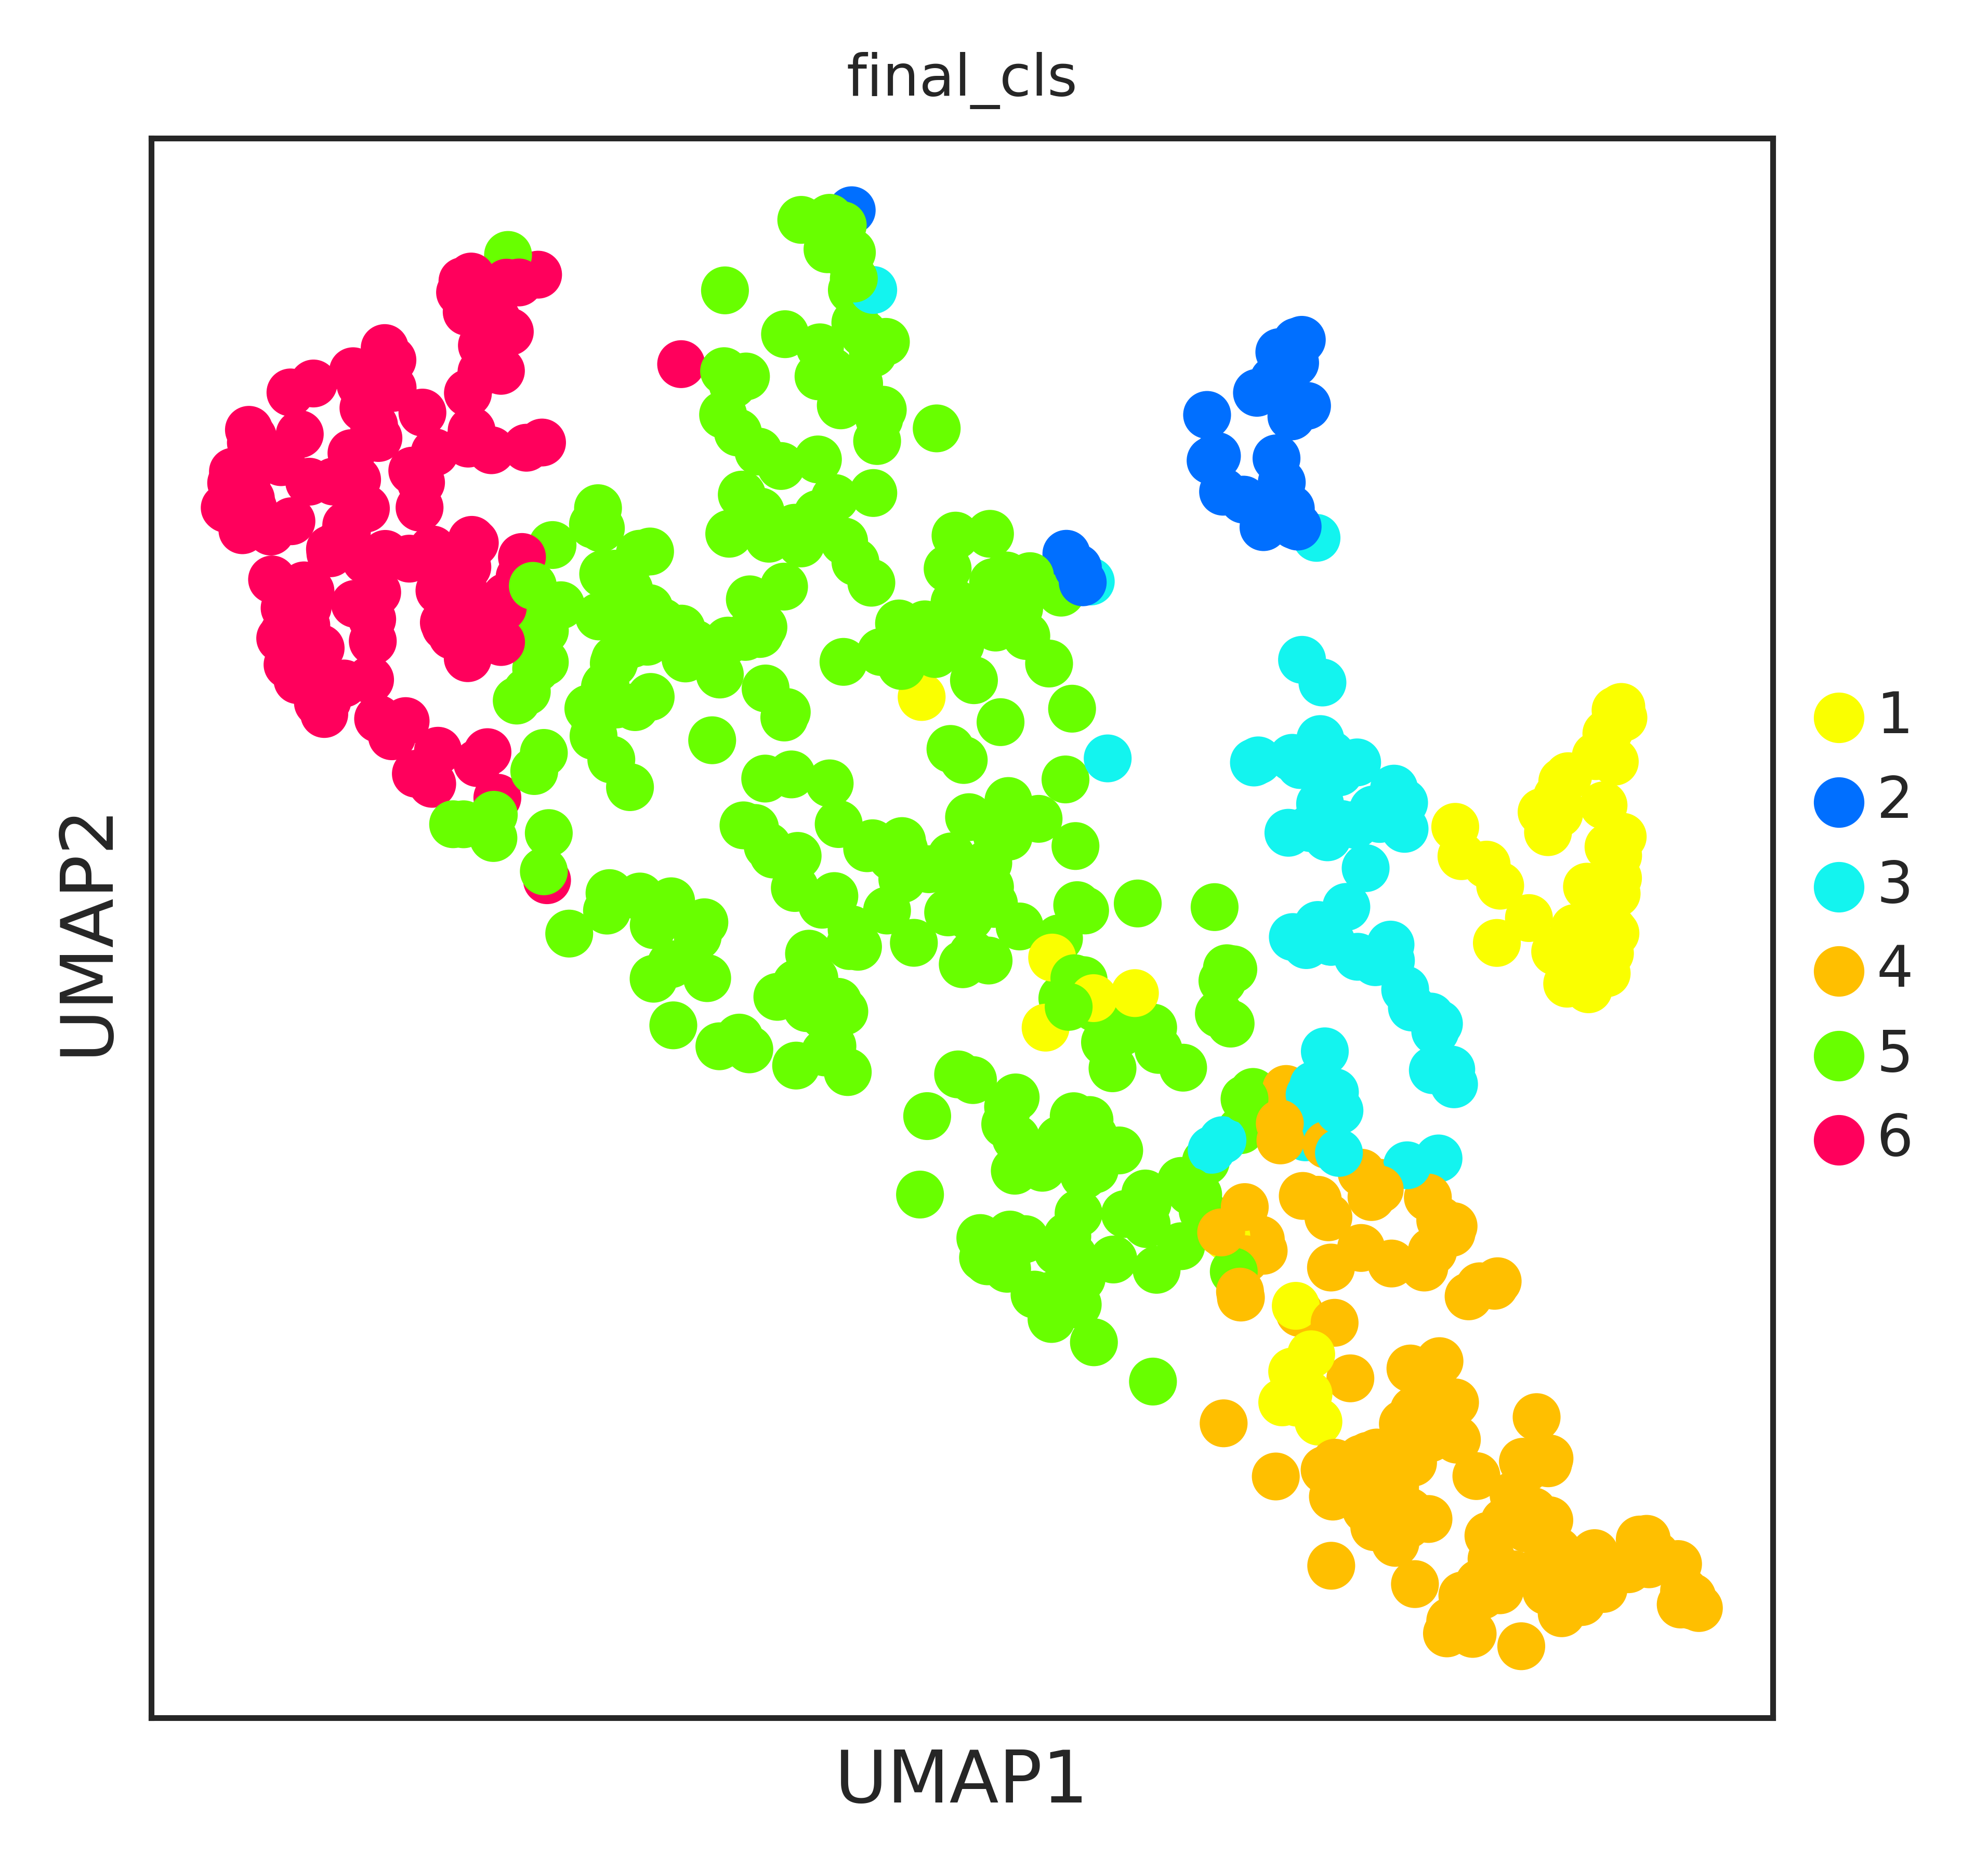

In [88]:
sc.pl.umap(a,color=['final_cls'])

In [89]:
# markers = ['59.3','69.31','71.33','87.36','55.3','101.4','85.37','57.29','53.28','86.35']
markers = ['145.41']

In [90]:
pd_dict = {
    'm/z':[],
    'cls':[],
    'intensity':[],
    'cls_name':[]
}
for c in ['5','6']:
    cls_id_list = [c]
    cls_array = np.array(a.obs['final_cls'])
    marker_idx = [np.where(np.array(a.var_names)==m)[0][0] for m in markers]
    cell_profile = get_pixelProfile_from_clsID(cls_id_list,cls_array)[:,marker_idx]
    for i in range(cell_profile.shape[0]):
        for j in range(cell_profile.shape[1]):
            cur_m = markers[j]
            cur_cls = c
            
            if c=='5':
                cls_name = 'C2'
            if c=='6':
                cls_name = 'C1'
            pd_dict['cls_name'].append(cls_name)
            cur_intensity = cell_profile[i,j]
            pd_dict['m/z'].append(cur_m)
            pd_dict['cls'].append(cur_cls)
            pd_dict['intensity'].append(cur_intensity)

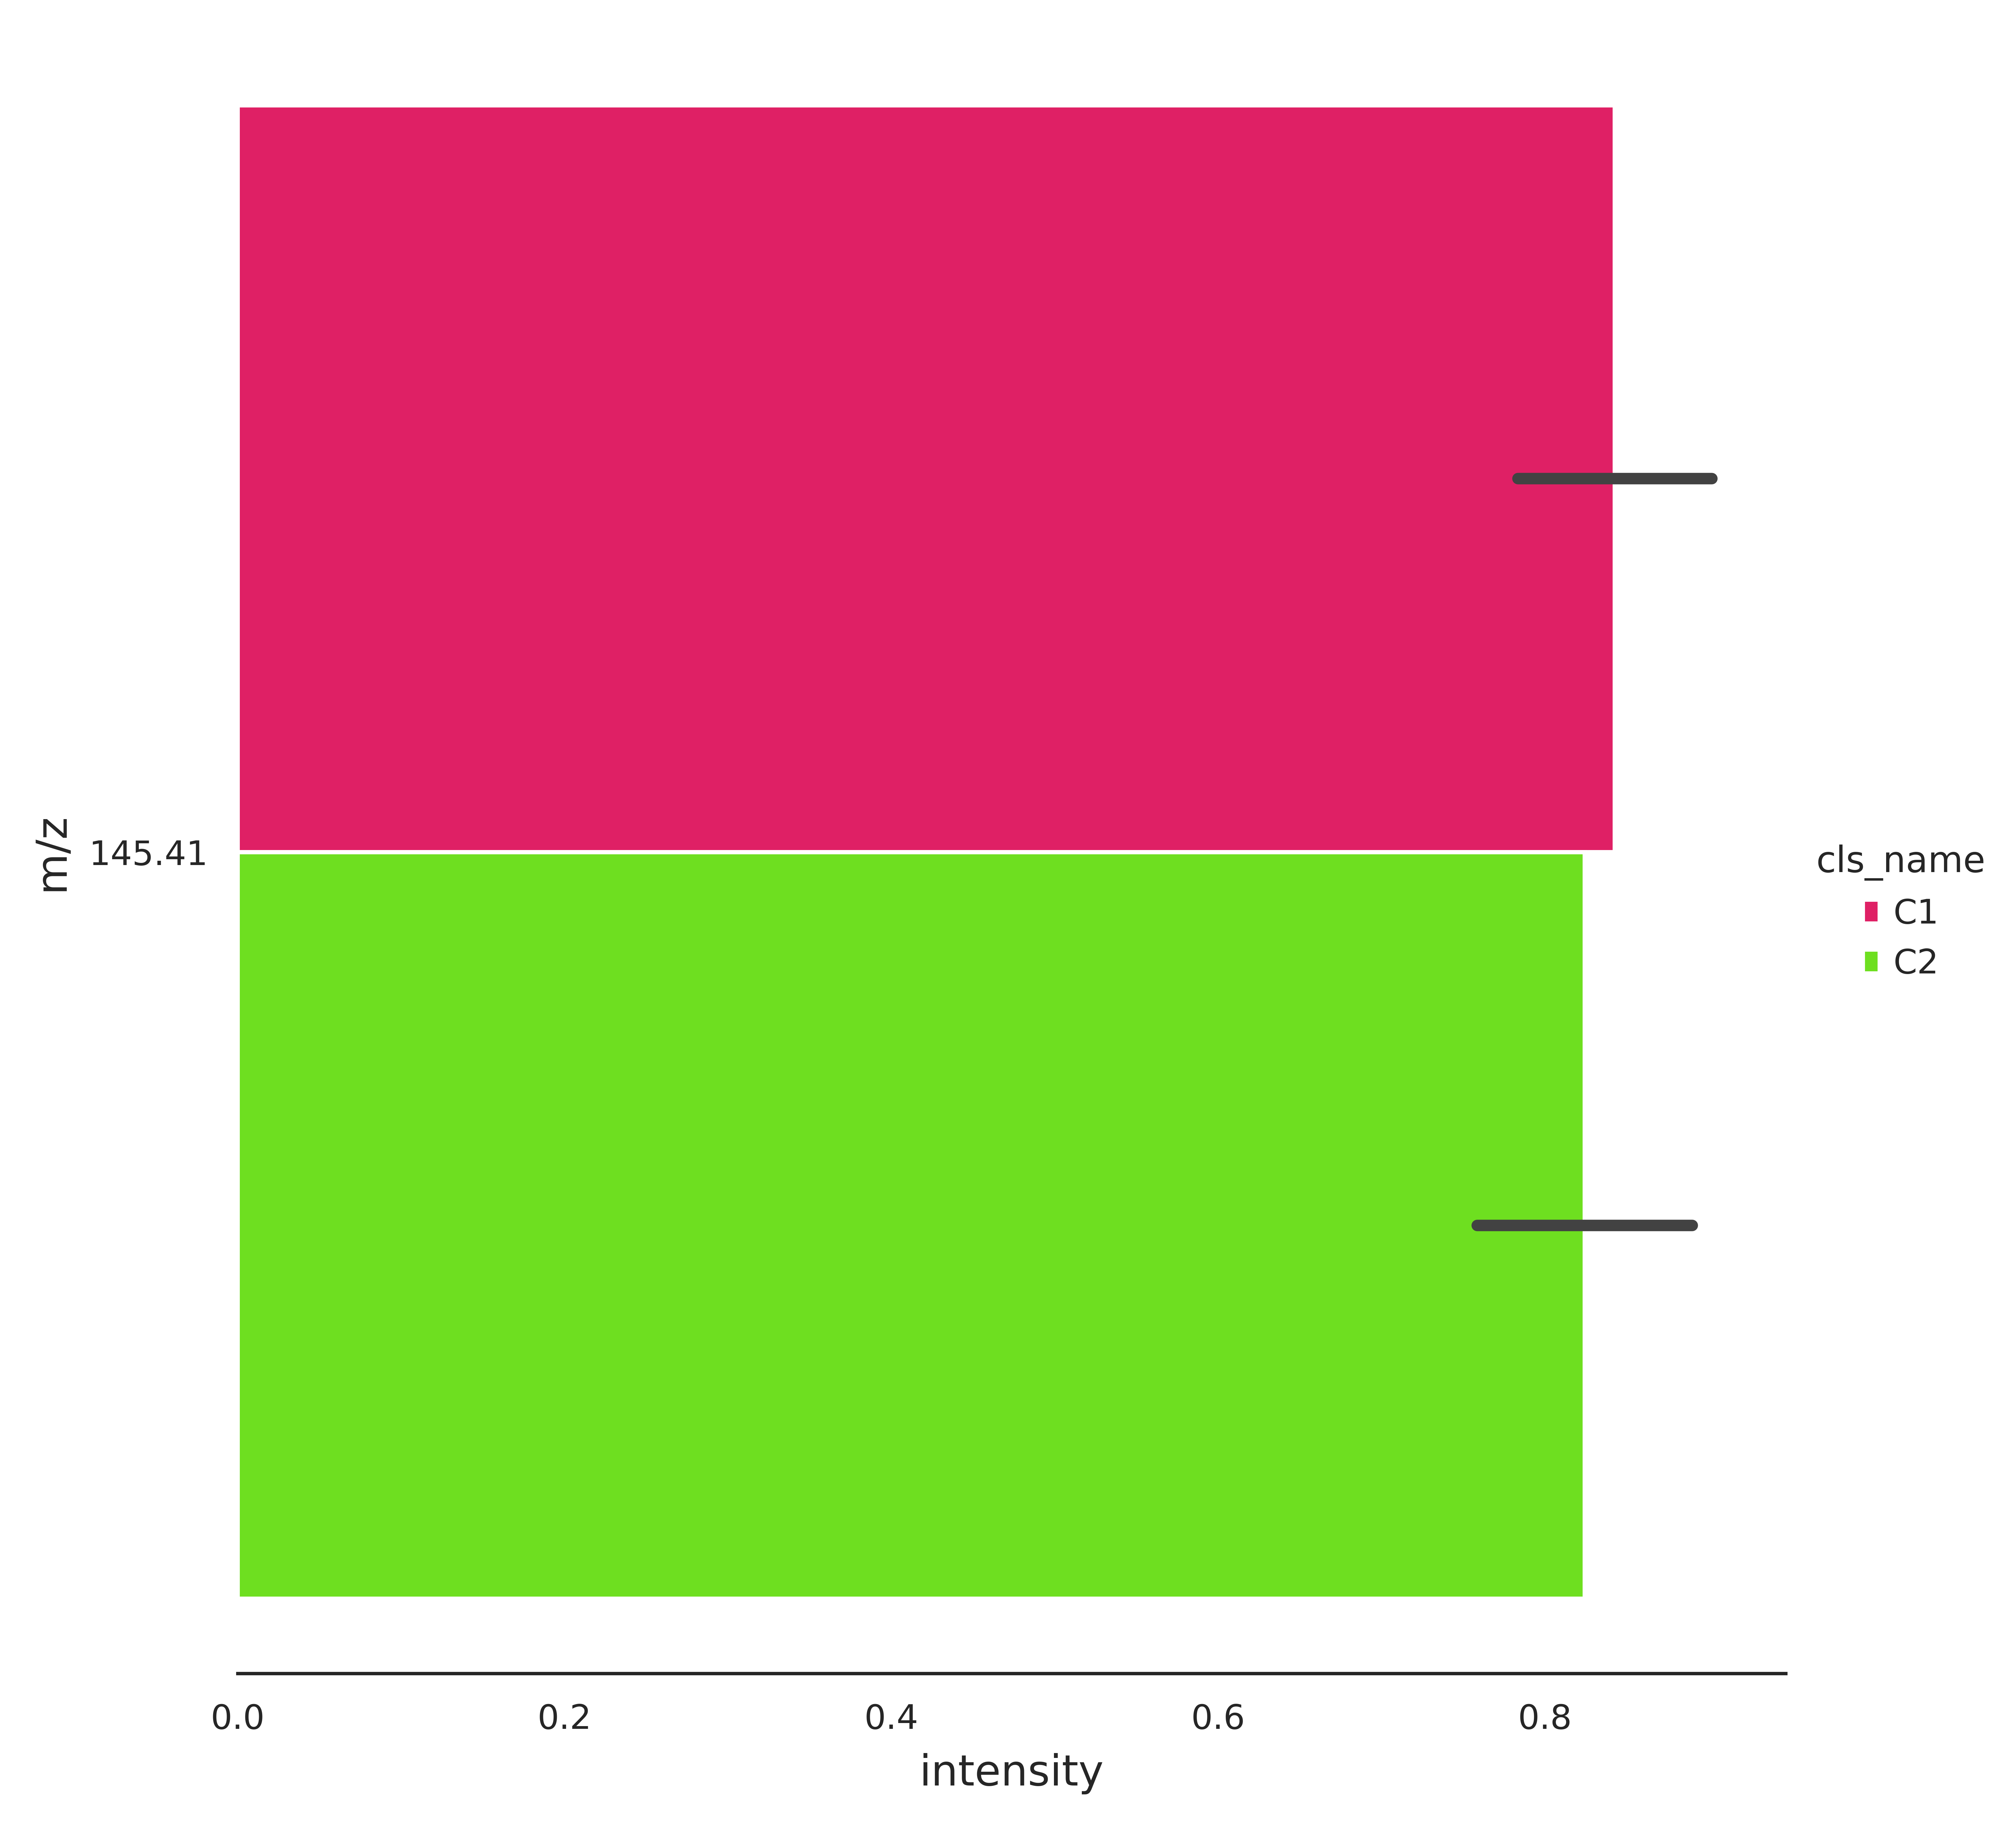

In [91]:
pd_df = pd.DataFrame(pd_dict)
cmp_bold = palettable.cartocolors.qualitative.Bold_10.mpl_colors
# cmp_use = [cmp_bold[4],cmp_bold[0],cmp_bold[1],cmp_bold[2],cmp_bold[3],cmp_bold[5]]
# hue_order = ['SIMSCut','EB','HMRF','RW','Threshold','WSedt']
hue_order = ['C1','C2']
cmp_use = a.uns['final_cls_colors'][-3:][::-1]
order = markers
g = sns.catplot(
    data=pd_df, kind="bar",
    x="intensity", y="m/z", hue="cls_name",aspect=1,
    ci="sd", alpha=1, height=6,
    order=order,palette=cmp_use,hue_order=hue_order,
    orient='h',
)
g.despine(left=True)
g.set_axis_labels("intensity", "m/z")
# g.legend.set_title("")

### all

In [92]:
pd_df_list.append(pd_df[['intensity','cls_name']])

In [96]:
pd_df_all = pd.concat(pd_df_list)

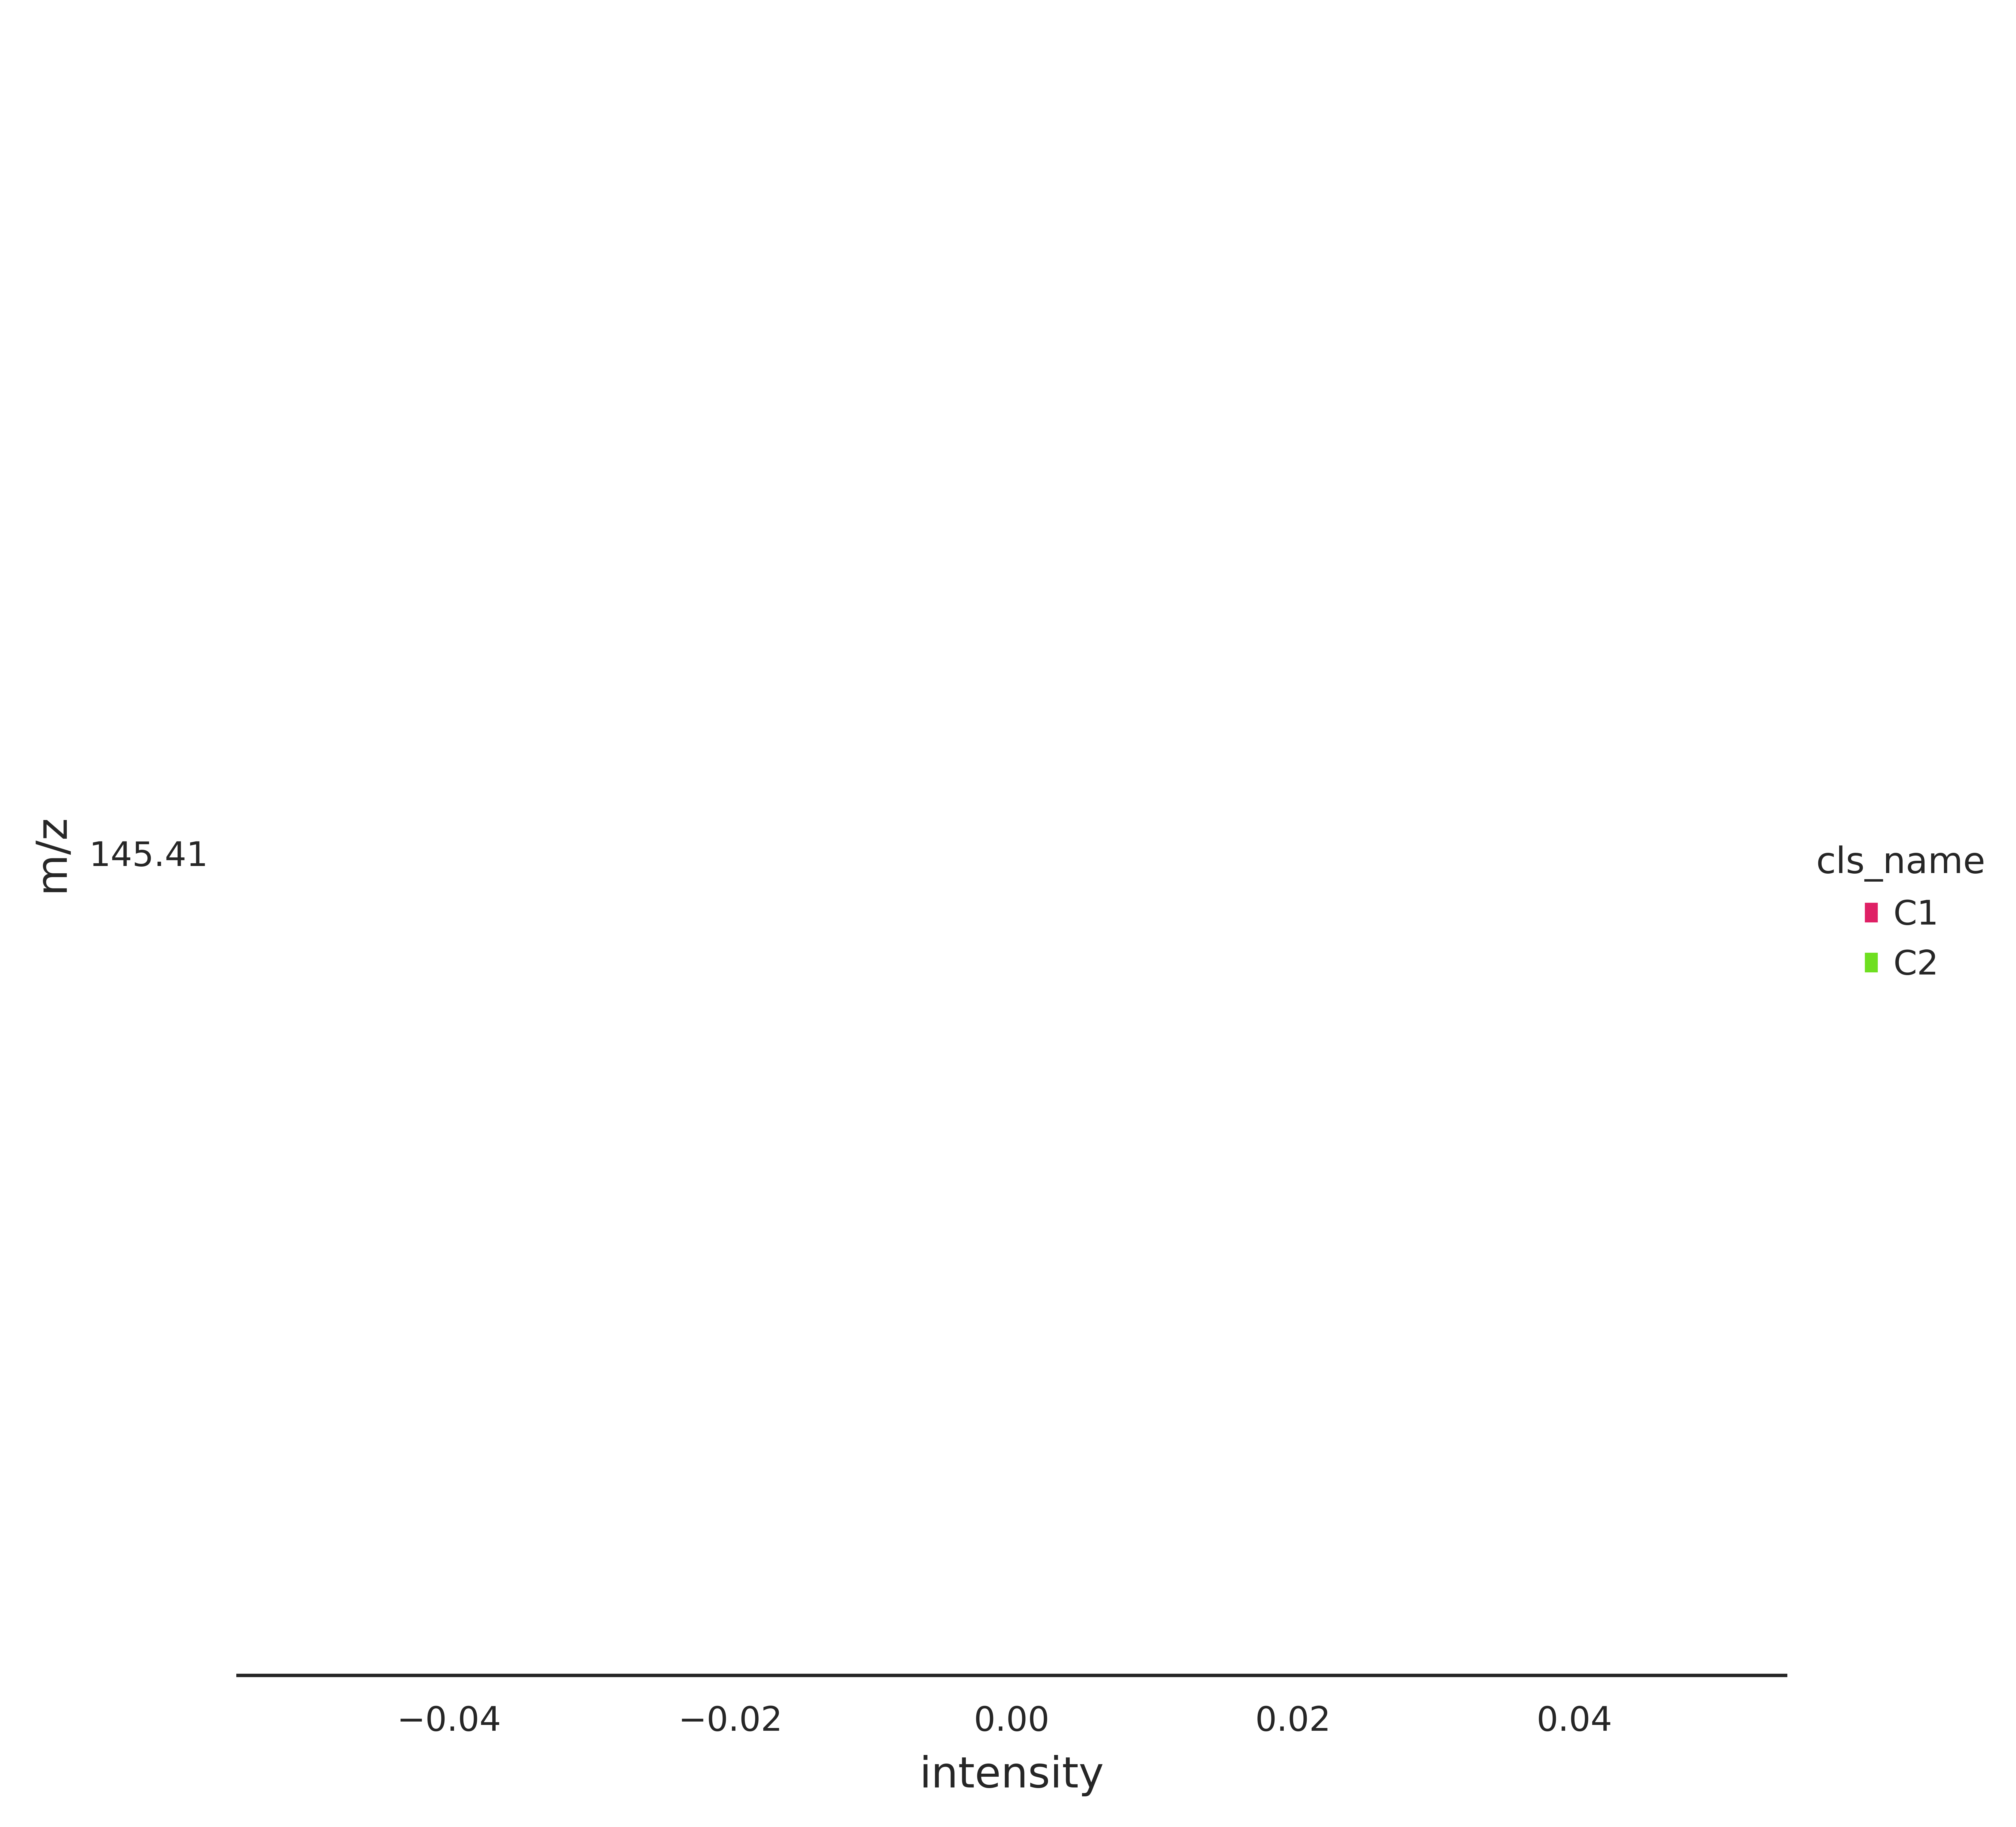

In [100]:
pd_df = pd_df_all
cmp_bold = palettable.cartocolors.qualitative.Bold_10.mpl_colors
# cmp_use = [cmp_bold[4],cmp_bold[0],cmp_bold[1],cmp_bold[2],cmp_bold[3],cmp_bold[5]]
# hue_order = ['SIMSCut','EB','HMRF','RW','Threshold','WSedt']
hue_order = ['C1','C2']
cmp_use = a.uns['final_cls_colors'][-3:][::-1]
order = markers
g = sns.catplot(
    data=pd_df, kind="bar",
    x="intensity", y="cls_name", hue="cls_name",aspect=1,
    ci="sd", alpha=1, height=6,
    order=order,palette=cmp_use,hue_order=hue_order,
    orient='h',
)
g.despine(left=True)
g.set_axis_labels("intensity", "m/z")
# g.legend.set_title("")

In [101]:
pd_df_all

intensity cls_name
0     0.970330       C2
1     0.915487       C2
2     0.829360       C2
3     0.788457       C2
4     0.808018       C2
..         ...      ...
407   0.767192       C1
408   0.775362       C1
409   0.879404       C1
410   0.825019       C1
411   0.802357       C1

[1263 rows x 2 columns]

In [103]:
C1_int = pd_df_all[pd_df_all['cls_name']=='C1']['intensity']
C2_int = pd_df_all[pd_df_all['cls_name']=='C2']['intensity']

ttest_ind(C1_int,C2_int)

Ttest_indResult(statistic=3.1641553001376175, pvalue=0.0015925052995140073)

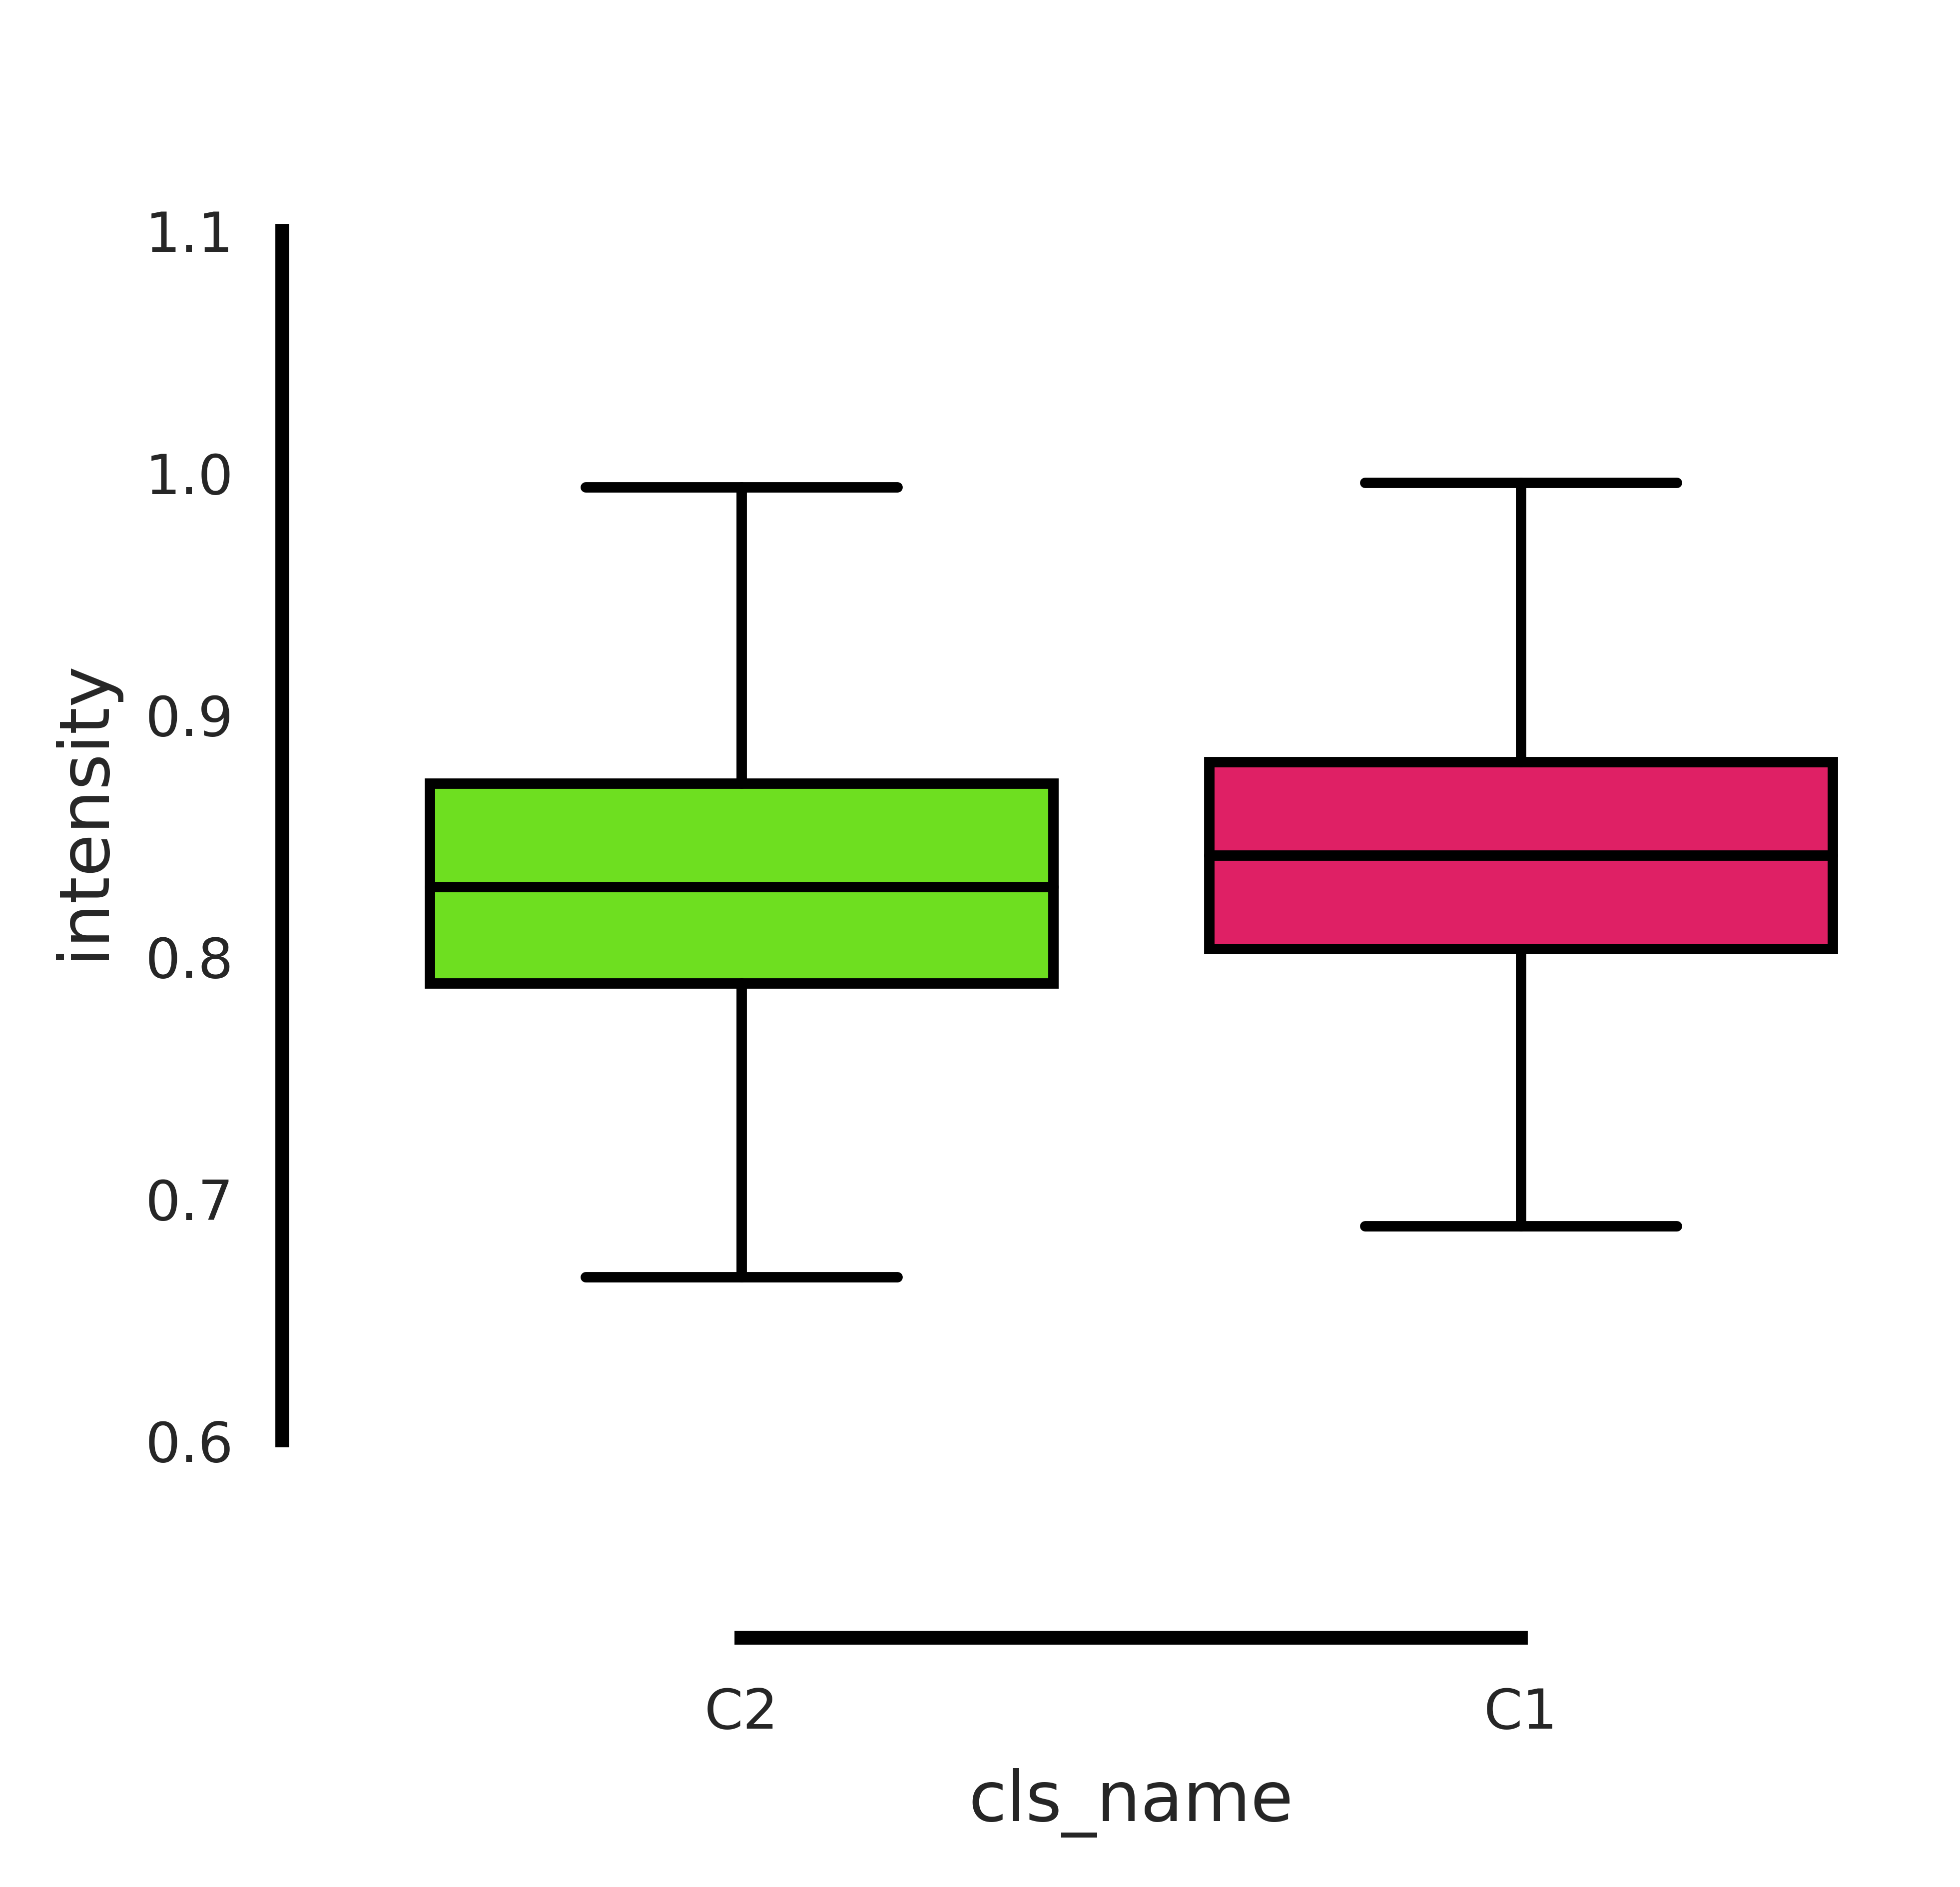

In [117]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
cmp_use = a.uns['final_cls_colors'][-2:]
hue_order = ['C1','C2']



# g = sns.boxplot(x="dist_lim", y="dist",
#             hue="hepa_type", palette=["#FF005C", "#68FF00"],saturation=1,fliersize=1,linewidth=2,
#             data=hepa_dist_pd_df,ax=ax)
g=sns.boxplot(y="intensity", x="cls_name",
            palette=cmp_use,hue_order=hue_order,fliersize=0,
            data=pd_df_all,ax=ax)
sns.despine(offset=10, trim=True)
# ax.get_legend().remove()

for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
#     box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         ax.lines[j].set_color('black')

# plt.savefig(save,transparent=True,format='png',bbox_inches='tight',dpi=500)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
# ax.spines["left"].set_facecolor("red")
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)

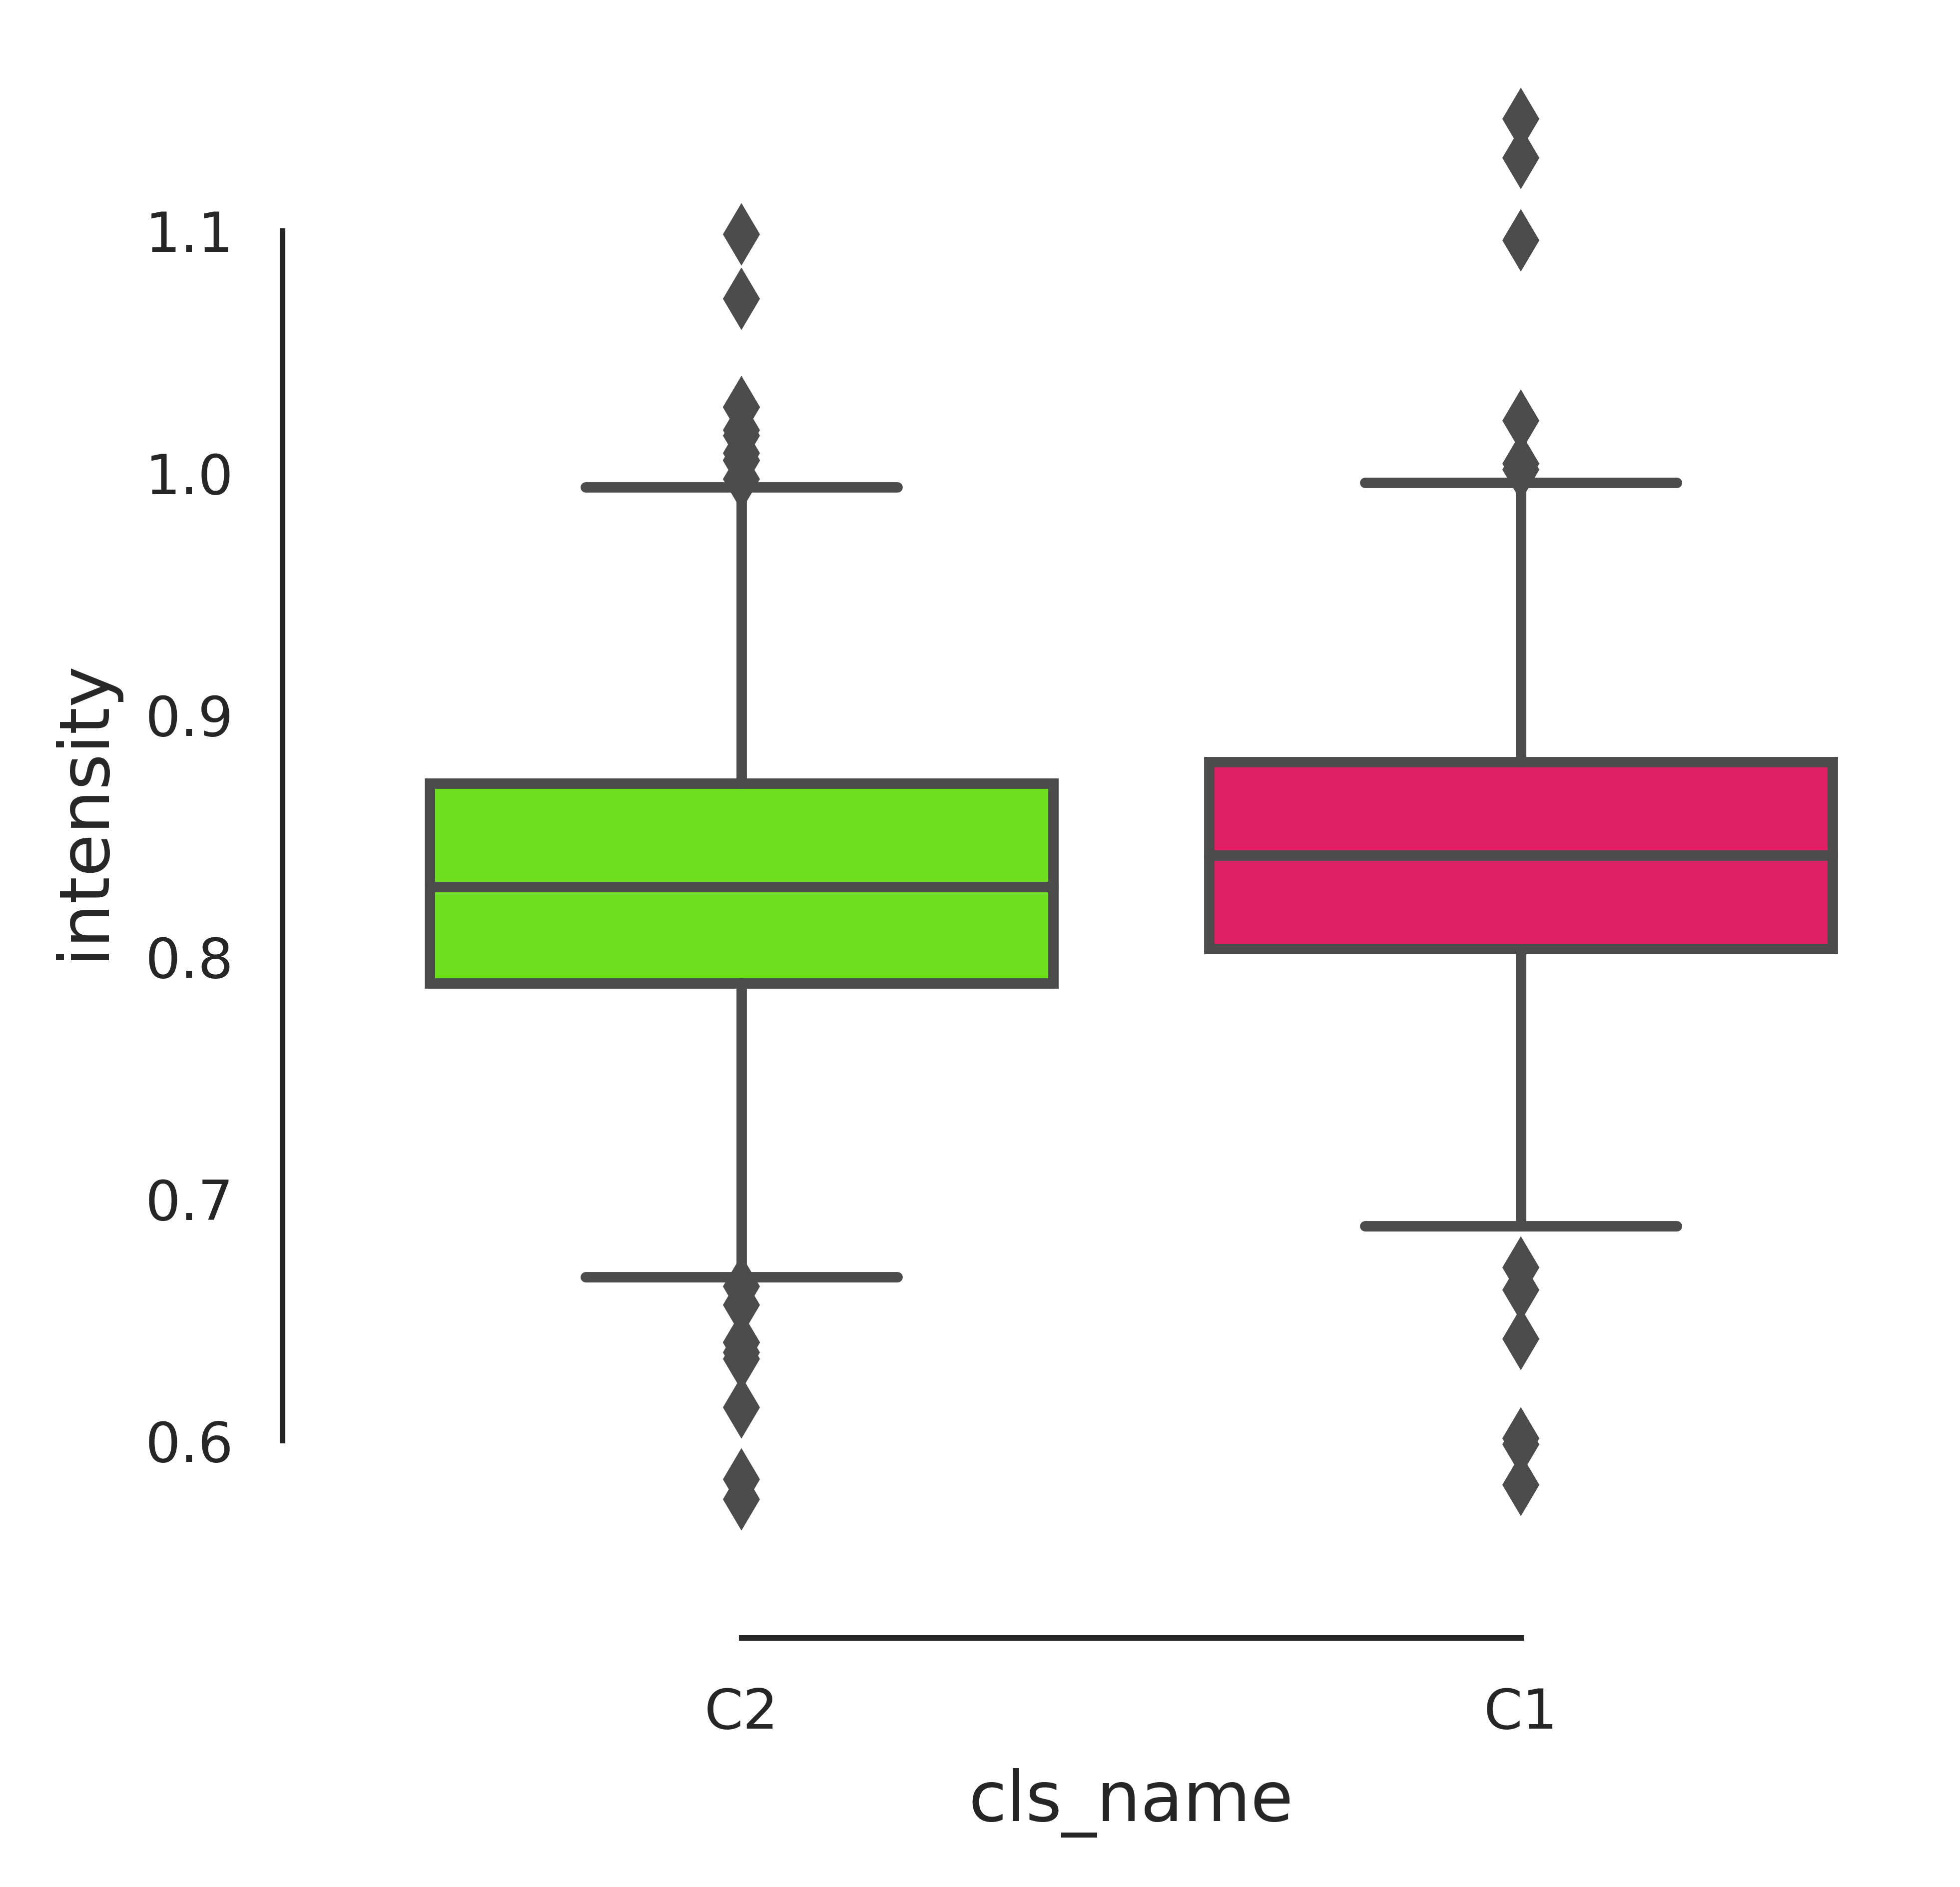

In [110]:
cmp_use = a.uns['final_cls_colors'][-2:]
hue_order = ['C1','C2']

sns.boxplot(y="intensity", x="cls_name",
            palette=cmp_use,hue_order=hue_order,
            data=pd_df_all)
sns.despine(offset=10, trim=True)

In [118]:
a_liver = sc.read_h5ad('/home/yzy/projects/SEAM/SEAM_old/data/h5ad/mouse/liver/data.h5ad')
a_liver_R = sc.read_h5ad('/home/yzy/projects/SEAM/SEAM_old/data/h5ad/mouse/liver/liver_revision.h5ad')
a_R1 = sc.read_h5ad('/home/yzy/projects/SEAM/SEAM_old/data/h5ad/human/R1/data.h5ad')

In [152]:
def reg_mz(target_int,a_use=a_liver):
#     target_int = 87
#     a_use = a_liver
    original_liver = np.array(a_use.var_names,dtype='float')
    int_liver = original_liver.astype('int')
    adenine_idx = np.where(int_liver==134)[0][0]

    print(original_liver[adenine_idx])
    offset = original_liver[adenine_idx]-134.12

    reg_liver = original_liver-offset

    return reg_liver[np.where(int_liver==target_int)]

In [153]:
reg_mz(87,a_liver)

134.48


array([87.])